## Problem Statement:
- An education company named X Education sells online courses to industry professionals. The company markets its courses on their website, several websites and search engines like Google.
- When people fill up a form providing their email address or phone number, they are classified to be a lead. Moreover, the company also gets leads through past referrals.
- Although X Education gets a lot of leads, its lead conversion rate is very poor around 30%. To make this process more efficient, the company wishes to identify the most potential leads, also known as ‘Hot Leads’. 
- If the company successfully identify this set of leads, the lead conversion rate should go up as the sales team will now be focusing more on communicating with the potential leads rather than making calls to everyone.
- Need to find out most promising leads that are most likely to convert into paying customers. The company requires you to build a model wherein you need to assign a lead score to each of the leads such that the customers with a higher lead score have a higher conversion chance and the customers with a lower lead score have a lower conversion chance. 
- The CEO, in particular, has given a ballpark of the target lead conversion rate to be around 80%.

## Data Understanding
- Lead dataset from past has 9000 datapoints.
- Converted is the target variable and value 1 means lead was converted.
- Data dictionary has all the details of the columns.
- Many categorical variables have level 'Select' which need to be handled.

## Goals of Case Study
- Build a logistic regression model to assign a lead score between 0 and 100 to each of the leads. A higher score would mean a lead is hot.
- Which are the top three variables in your model which contribute most towards the probability of a lead getting converted?
- What are the top 3 categorical/dummy variables in the model which should be focused the most on in order to increase the probability of lead conversion?
- For a period of 2 months in a year new interns are hired and company wants to make lead conversion aggressively during this time. What would be a good strategy to be applied at this stage?
- When company reaches its target for a quarter before deadline, they want to minimize the rate of useless calls. What would be a good strategy to be applied at this stage?

## Linear Regression Model 
Lets build a linear regression model to predict Leads using appropriate predictor variables


### Reading and Understanding the data
#### Steps:
- Importing data using the pandas library
- Understanding the structure of data

In [1]:
# Supress Warnings

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Import the numpy and pandas package

import numpy as np
import pandas as pd

# Import matplotlib and seaborn package

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


import random
from scipy.stats import norm, skew

In [3]:
# Read the given CSV file, and view some sample records

leadscore = pd.read_csv("Leads.csv")
leadscore.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


#### Let's inspect the various aspects of our dataframe

In [4]:
leadscore.shape #Gives structure of dataset

(9240, 37)

In [5]:
leadscore.describe() #Gives statistical information of numeric columns

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [6]:
leadscore.info() #Gives detailed information of datasets in each column alongwith non null count

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [7]:
#checking number of null values in each columns and sorting them in descending order
leadscore.isnull().sum().sort_values(ascending=False)

Lead Quality                                     4767
Asymmetrique Activity Index                      4218
Asymmetrique Profile Score                       4218
Asymmetrique Activity Score                      4218
Asymmetrique Profile Index                       4218
Tags                                             3353
Lead Profile                                     2709
What matters most to you in choosing a course    2709
What is your current occupation                  2690
Country                                          2461
How did you hear about X Education               2207
Specialization                                   1438
City                                             1420
Page Views Per Visit                              137
TotalVisits                                       137
Last Activity                                     103
Lead Source                                        36
Receive More Updates About Our Courses              0
I agree to pay the amount th

In [8]:
#checking percentage of null values in each columns and sorting them in descending order
((leadscore.isnull().sum()/len(leadscore))*100).sort_values(ascending=False)

Lead Quality                                     51.590909
Asymmetrique Activity Index                      45.649351
Asymmetrique Profile Score                       45.649351
Asymmetrique Activity Score                      45.649351
Asymmetrique Profile Index                       45.649351
Tags                                             36.287879
Lead Profile                                     29.318182
What matters most to you in choosing a course    29.318182
What is your current occupation                  29.112554
Country                                          26.634199
How did you hear about X Education               23.885281
Specialization                                   15.562771
City                                             15.367965
Page Views Per Visit                              1.482684
TotalVisits                                       1.482684
Last Activity                                     1.114719
Lead Source                                       0.3896

### Data Cleaning and Preparation

In [9]:
# Lets consider allowed threshhold of upto 30% in each column for missing or null values
# Define the threshold for null value percentage
threshold = 30

# Calculate the percentage of null values for each column
percentage_null_values = (leadscore.isnull().sum() / len(leadscore)) * 100

# Find columns with null value percentage greater than the threshold
columns_to_drop = percentage_null_values[percentage_null_values > threshold].index

# Remove the columns from the DataFrame
leadscore = leadscore.drop(columns=columns_to_drop)

# Display the cleaned DataFrame
leadscore.head()



,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,No,No,No,No,Select,Select,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,No,No,No,No,Select,Select,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,No,No,No,No,Potential Lead,Mumbai,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,No,No,No,No,Select,Mumbai,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,No,No,No,No,Select,Mumbai,No,No,Modified


In [10]:
# Confirm columns are dropped
((leadscore.isnull().sum()/len(leadscore))*100).sort_values(ascending=False)

What matters most to you in choosing a course    29.318182
Lead Profile                                     29.318182
What is your current occupation                  29.112554
Country                                          26.634199
How did you hear about X Education               23.885281
Specialization                                   15.562771
City                                             15.367965
Page Views Per Visit                              1.482684
TotalVisits                                       1.482684
Last Activity                                     1.114719
Lead Source                                       0.389610
Get updates on DM Content                         0.000000
Newspaper                                         0.000000
I agree to pay the amount through cheque          0.000000
A free copy of Mastering The Interview            0.000000
Update me on Supply Chain Content                 0.000000
Receive More Updates About Our Courses            0.0000

In [11]:
# Lets get the count of remaining leadscore dataframe columns having missing / null values
leadscore.isnull().sum().sort_values(ascending=False)

What matters most to you in choosing a course    2709
Lead Profile                                     2709
What is your current occupation                  2690
Country                                          2461
How did you hear about X Education               2207
Specialization                                   1438
City                                             1420
Page Views Per Visit                              137
TotalVisits                                       137
Last Activity                                     103
Lead Source                                        36
Get updates on DM Content                           0
Newspaper                                           0
I agree to pay the amount through cheque            0
A free copy of Mastering The Interview              0
Update me on Supply Chain Content                   0
Receive More Updates About Our Courses              0
Through Recommendations                             0
Digital Advertisement       

In [12]:
# Lets have a closer look at the Lead Source
leadscore['Lead Source'].value_counts()

Lead Source
Google               2868
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
bing                    6
google                  5
Click2call              4
Press_Release           2
Social Media            2
Live Chat               2
youtubechannel          1
testone                 1
Pay per Click Ads       1
welearnblog_Home        1
WeLearn                 1
blog                    1
NC_EDM                  1
Name: count, dtype: int64

#### Data Quality Issues

In [13]:
# There are multiple entries in the column (Google, google), (Facebook,Social Media,youtubechannel) , (welearnblog_Home,blog)
# Lets merge the redundant values
leadscore['Lead Source'].replace('google','Google',inplace = True)
leadscore['Lead Source'].replace('youtubechannel','Social Media',inplace = True)
leadscore['Lead Source'].replace('Facebook','Social Media',inplace = True)
leadscore['Lead Source'].replace('welearnblog_Home','blog',inplace = True)

In [14]:
leadscore['Lead Source'].value_counts()

Lead Source
Google               2873
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Social Media           58
bing                    6
Click2call              4
Press_Release           2
Live Chat               2
blog                    2
WeLearn                 1
testone                 1
Pay per Click Ads       1
NC_EDM                  1
Name: count, dtype: int64

In [15]:
# For Categorical column 'Lead Source' we can impute mode of the column to the missing / null values
leadscore['Lead Source']=leadscore['Lead Source'].fillna('Google')
leadscore['Lead Source'].value_counts()

Lead Source
Google               2909
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Social Media           58
bing                    6
Click2call              4
Press_Release           2
Live Chat               2
blog                    2
WeLearn                 1
testone                 1
Pay per Click Ads       1
NC_EDM                  1
Name: count, dtype: int64

In [16]:
# Lets get the count of remaining leadscore dataframe columns having missing / null values
leadscore.isnull().sum().sort_values(ascending=False)

What matters most to you in choosing a course    2709
Lead Profile                                     2709
What is your current occupation                  2690
Country                                          2461
How did you hear about X Education               2207
Specialization                                   1438
City                                             1420
Page Views Per Visit                              137
TotalVisits                                       137
Last Activity                                     103
Update me on Supply Chain Content                   0
X Education Forums                                  0
Get updates on DM Content                           0
I agree to pay the amount through cheque            0
A free copy of Mastering The Interview              0
Receive More Updates About Our Courses              0
Through Recommendations                             0
Digital Advertisement                               0
Newspaper                   

In [17]:
# Lets have a look at Last Activity column
leadscore['Last Activity'].value_counts()

Last Activity
Email Opened                    3437
SMS Sent                        2745
Olark Chat Conversation          973
Page Visited on Website          640
Converted to Lead                428
Email Bounced                    326
Email Link Clicked               267
Form Submitted on Website        116
Unreachable                       93
Unsubscribed                      61
Had a Phone Conversation          30
Approached upfront                 9
View in browser link Clicked       6
Email Received                     2
Email Marked Spam                  2
Visited Booth in Tradeshow         1
Resubscribed to emails             1
Name: count, dtype: int64

In [18]:
# Do not see any data quality issue here. Lets impute mode value for missing / null values
leadscore['Last Activity']=leadscore['Last Activity'].fillna("Email Opened")
leadscore['Last Activity'].value_counts()

Last Activity
Email Opened                    3540
SMS Sent                        2745
Olark Chat Conversation          973
Page Visited on Website          640
Converted to Lead                428
Email Bounced                    326
Email Link Clicked               267
Form Submitted on Website        116
Unreachable                       93
Unsubscribed                      61
Had a Phone Conversation          30
Approached upfront                 9
View in browser link Clicked       6
Email Received                     2
Email Marked Spam                  2
Visited Booth in Tradeshow         1
Resubscribed to emails             1
Name: count, dtype: int64

In [19]:
# Lets get the count of remaining leadscore dataframe columns having missing / null values
leadscore.isnull().sum().sort_values(ascending=False)

What matters most to you in choosing a course    2709
Lead Profile                                     2709
What is your current occupation                  2690
Country                                          2461
How did you hear about X Education               2207
Specialization                                   1438
City                                             1420
Page Views Per Visit                              137
TotalVisits                                       137
Update me on Supply Chain Content                   0
X Education Forums                                  0
Receive More Updates About Our Courses              0
Get updates on DM Content                           0
I agree to pay the amount through cheque            0
A free copy of Mastering The Interview              0
Through Recommendations                             0
Digital Advertisement                               0
Newspaper                                           0
Prospect ID                 

In [20]:
# Lets have a look at TotalVisits column
leadscore['TotalVisits'].value_counts()

TotalVisits
0.0      2189
2.0      1680
3.0      1306
4.0      1120
5.0       783
6.0       466
1.0       395
7.0       309
8.0       224
9.0       164
10.0      114
11.0       86
13.0       48
12.0       45
14.0       36
16.0       21
15.0       18
17.0       16
18.0       15
20.0       12
19.0        9
21.0        6
23.0        6
24.0        5
25.0        5
27.0        5
22.0        3
29.0        2
28.0        2
26.0        2
141.0       1
55.0        1
30.0        1
43.0        1
74.0        1
41.0        1
54.0        1
115.0       1
251.0       1
32.0        1
42.0        1
Name: count, dtype: int64

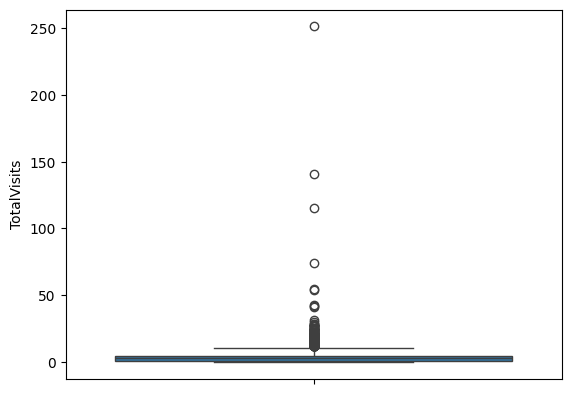

In [21]:
# TotalVisits is a numerical column, total visits count vary from 0 to ~251. Lets plot it and check for outliers
sns.boxplot(leadscore['TotalVisits'])
plt.show()

In [22]:
# Here we can impute null / missing values with median 
leadscore['TotalVisits'].fillna(leadscore['TotalVisits'].median(), inplace=True)

In [23]:
# Lets get the count of remaining leadscore dataframe columns having missing / null values
leadscore.isnull().sum().sort_values(ascending=False)

What matters most to you in choosing a course    2709
Lead Profile                                     2709
What is your current occupation                  2690
Country                                          2461
How did you hear about X Education               2207
Specialization                                   1438
City                                             1420
Page Views Per Visit                              137
Receive More Updates About Our Courses              0
Newspaper Article                                   0
Through Recommendations                             0
Update me on Supply Chain Content                   0
Get updates on DM Content                           0
I agree to pay the amount through cheque            0
A free copy of Mastering The Interview              0
Digital Advertisement                               0
Newspaper                                           0
X Education Forums                                  0
Prospect ID                 

In [24]:
# Lets have a look at TotalVisits column
leadscore['Page Views Per Visit'].value_counts()

Page Views Per Visit
0.00    2189
2.00    1795
3.00    1196
4.00     896
1.00     651
        ... 
3.43       1
2.56       1
6.33       1
1.64       1
2.08       1
Name: count, Length: 114, dtype: int64

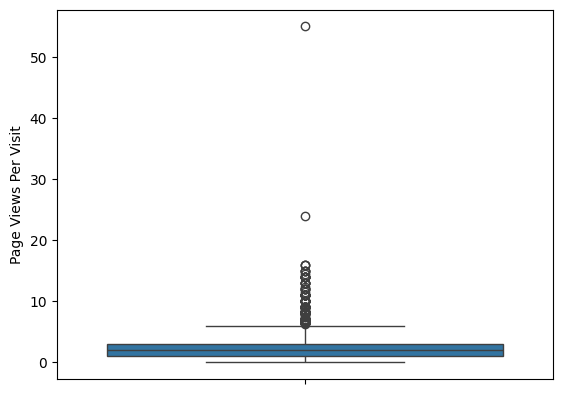

In [25]:
# Page Views Per Visit is a numerical column. Lets plot it and check for outliers
sns.boxplot(leadscore['Page Views Per Visit'])
plt.show()

In [26]:
# Here we can impute null / missing values with median 
leadscore['Page Views Per Visit'].fillna(leadscore['Page Views Per Visit'].median(), inplace=True)

In [27]:
# Lets get the count of remaining leadscore dataframe columns having missing / null values
leadscore.isnull().sum().sort_values(ascending=False)

What matters most to you in choosing a course    2709
Lead Profile                                     2709
What is your current occupation                  2690
Country                                          2461
How did you hear about X Education               2207
Specialization                                   1438
City                                             1420
Digital Advertisement                               0
Newspaper                                           0
Receive More Updates About Our Courses              0
Through Recommendations                             0
Newspaper Article                                   0
Update me on Supply Chain Content                   0
Get updates on DM Content                           0
I agree to pay the amount through cheque            0
A free copy of Mastering The Interview              0
X Education Forums                                  0
Prospect ID                                         0
Magazine                    

#### Here City variable is dependent on Country. So, lets take country column first for cleanup.

In [28]:
# Lets have a look at How did you hear about X Education column
leadscore['Country'].value_counts()

Country
India                   6492
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Hong Kong                  7
Bahrain                    7
Oman                       6
France                     6
unknown                    5
South Africa               4
Nigeria                    4
Germany                    4
Kuwait                     4
Canada                     4
Sweden                     3
China                      2
Asia/Pacific Region        2
Uganda                     2
Bangladesh                 2
Italy                      2
Belgium                    2
Netherlands                2
Ghana                      2
Philippines                2
Russia                     1
Switzerland                1
Vietnam                    1
Denmark                    1
Tanzania                   1
Liberia                    1
Malays

In [29]:
#imputing mode value for missing / null values
leadscore['Country']=leadscore['Country'].fillna("India")
leadscore['Country'].value_counts()

Country
India                   8953
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Hong Kong                  7
Bahrain                    7
Oman                       6
France                     6
unknown                    5
South Africa               4
Nigeria                    4
Germany                    4
Kuwait                     4
Canada                     4
Sweden                     3
China                      2
Asia/Pacific Region        2
Uganda                     2
Bangladesh                 2
Italy                      2
Belgium                    2
Netherlands                2
Ghana                      2
Philippines                2
Russia                     1
Switzerland                1
Vietnam                    1
Denmark                    1
Tanzania                   1
Liberia                    1
Malays

In [30]:
(leadscore['Country'].value_counts()/len(leadscore))*100

Country
India                   96.893939
United States            0.746753
United Arab Emirates     0.573593
Singapore                0.259740
Saudi Arabia             0.227273
United Kingdom           0.162338
Australia                0.140693
Qatar                    0.108225
Hong Kong                0.075758
Bahrain                  0.075758
Oman                     0.064935
France                   0.064935
unknown                  0.054113
South Africa             0.043290
Nigeria                  0.043290
Germany                  0.043290
Kuwait                   0.043290
Canada                   0.043290
Sweden                   0.032468
China                    0.021645
Asia/Pacific Region      0.021645
Uganda                   0.021645
Bangladesh               0.021645
Italy                    0.021645
Belgium                  0.021645
Netherlands              0.021645
Ghana                    0.021645
Philippines              0.021645
Russia                   0.010823
Switze

#### Here we need to checkout for levels present in Country - categorical variable. 

- We can club Asia/Pacific Region countries together whose proportion of contribution is not more than 0.25% - Singapore, Hong Kong, Bahrain, Oman, Kuwait, China, Bangladesh, Philippines, Malaysia, Sri Lanka, Indonesia, Vietnam, Austrlia
- We can club together coutries whose proportion of contribution is less than 0.01% to Other category -
unknown, South Africa, Canada, Nigeria, Germany, Sweden, Uganda, Italy, Netherlands, Belgium, Ghana, Kenya, Russia, Tanzania, Liberia, Switzerland, Denmark

In [31]:
# Define a list of countries to be merged into 'Other'
countries_to_merge = ['Singapore','Hong Kong','Bahrain','Oman','Kuwait','China','Bangladesh','Philippines','Malaysia',
                      'Sri Lanka','Indonesia','Vietnam','Austrlia']

# Replace the specified countries with 'Asia/Pacific Region'
leadscore['Country'].replace(countries_to_merge, 'Asia/Pacific Region', inplace=True)

In [32]:
leadscore['Country'].value_counts()

Country
India                   8953
United States             69
Asia/Pacific Region       60
United Arab Emirates      53
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
France                     6
unknown                    5
South Africa               4
Canada                     4
Nigeria                    4
Germany                    4
Sweden                     3
Uganda                     2
Italy                      2
Netherlands                2
Belgium                    2
Ghana                      2
Kenya                      1
Russia                     1
Tanzania                   1
Liberia                    1
Switzerland                1
Denmark                    1
Name: count, dtype: int64

In [33]:
# Define a list of countries to be merged into 'Other'
countries_to_merge = ['unknown', 'South Africa', 'Canada', 'Nigeria', 'Germany', 'Sweden', 'Uganda', 'Italy', 'Netherlands', 'Belgium', 
                      'Ghana', 'Kenya', 'Russia', 'Tanzania', 'Liberia', 'Switzerland', 'Denmark']

# Replace the specified countries with 'Other'
leadscore['Country'].replace(countries_to_merge, 'Other', inplace=True)

In [34]:
leadscore['Country'].value_counts()

Country
India                   8953
United States             69
Asia/Pacific Region       60
United Arab Emirates      53
Other                     40
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
France                     6
Name: count, dtype: int64

In [35]:
# Lets get the count of remaining leadscore dataframe columns having missing / null values
leadscore.isnull().sum().sort_values(ascending=False)

What matters most to you in choosing a course    2709
Lead Profile                                     2709
What is your current occupation                  2690
How did you hear about X Education               2207
Specialization                                   1438
City                                             1420
Digital Advertisement                               0
X Education Forums                                  0
Newspaper                                           0
Receive More Updates About Our Courses              0
Through Recommendations                             0
Magazine                                            0
Update me on Supply Chain Content                   0
Get updates on DM Content                           0
I agree to pay the amount through cheque            0
A free copy of Mastering The Interview              0
Newspaper Article                                   0
Prospect ID                                         0
Search                      

In [36]:
# Lets have a look at City column
leadscore['City'].value_counts()

City
Mumbai                         3222
Select                         2249
Thane & Outskirts               752
Other Cities                    686
Other Cities of Maharashtra     457
Other Metro Cities              380
Tier II Cities                   74
Name: count, dtype: int64

In [37]:
# Here we can see that Select has 2249 count which is same as null and already 1420 value are missing.
# Sum comes out to be 3669 which is more than the 30% accepted threshold. Lets not drop city column but try to clean it further to understand 
# leads from the cities. Lets assign Unknown value to missing/null values.

leadscore['City']=leadscore['City'].replace("Select","Unknown")
leadscore['City']=leadscore['City'].fillna("Unknown")

In [38]:
# Lets have a look at City column
leadscore['City'].value_counts()

City
Unknown                        3669
Mumbai                         3222
Thane & Outskirts               752
Other Cities                    686
Other Cities of Maharashtra     457
Other Metro Cities              380
Tier II Cities                   74
Name: count, dtype: int64

In [39]:
# Dataset has multiple countries but only indian cities  are visible. Lets have a look at leadscore city column having country other than india
leadscore[leadscore['Country']!='India']['City']

14           Unknown
87            Mumbai
103           Mumbai
207          Unknown
243           Mumbai
            ...     
9139          Mumbai
9173         Unknown
9225          Mumbai
9235          Mumbai
9239    Other Cities
Name: City, Length: 287, dtype: object

In [40]:
# Lets replace these with "Other International City" value
leadscore.loc[leadscore['Country']!='India','City']="Other International City"
leadscore[leadscore['Country']!='India']['City']

14      Other International City
87      Other International City
103     Other International City
207     Other International City
243     Other International City
                  ...           
9139    Other International City
9173    Other International City
9225    Other International City
9235    Other International City
9239    Other International City
Name: City, Length: 287, dtype: object

In [41]:
# Lets have a look at City column
leadscore['City'].value_counts()

City
Unknown                        3609
Mumbai                         3129
Thane & Outskirts               731
Other Cities                    619
Other Cities of Maharashtra     434
Other Metro Cities              360
Other International City        287
Tier II Cities                   71
Name: count, dtype: int64

In [42]:
# Lets get the count of remaining leadscore dataframe columns having missing / null values
leadscore.isnull().sum().sort_values(ascending=False)

What matters most to you in choosing a course    2709
Lead Profile                                     2709
What is your current occupation                  2690
How did you hear about X Education               2207
Specialization                                   1438
Through Recommendations                             0
X Education Forums                                  0
Newspaper                                           0
Digital Advertisement                               0
Receive More Updates About Our Courses              0
Magazine                                            0
Update me on Supply Chain Content                   0
Get updates on DM Content                           0
City                                                0
I agree to pay the amount through cheque            0
A free copy of Mastering The Interview              0
Newspaper Article                                   0
Prospect ID                                         0
Search                      

In [43]:
# Lets have a look at Specialization column
leadscore['Specialization'].value_counts()

Specialization
Select                               1942
Finance Management                    976
Human Resource Management             848
Marketing Management                  838
Operations Management                 503
Business Administration               403
IT Projects Management                366
Supply Chain Management               349
Banking, Investment And Insurance     338
Travel and Tourism                    203
Media and Advertising                 203
International Business                178
Healthcare Management                 159
Hospitality Management                114
E-COMMERCE                            112
Retail Management                     100
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: count, dtype: int64

In [44]:
# Here we can see that Select has 1942 count which is same as null and already 1438 value are missing.
# Sum comes out to be 3380 which is more than the 30% accepted threshold. Lets not drop Specialization column but try to clean 
# it further to understand leads from different Specializations. Lets assign Unknown value to missing/null values.
leadscore.Specialization.replace("Select","Unknown",inplace=True)
leadscore.Specialization.value_counts()

Specialization
Unknown                              1942
Finance Management                    976
Human Resource Management             848
Marketing Management                  838
Operations Management                 503
Business Administration               403
IT Projects Management                366
Supply Chain Management               349
Banking, Investment And Insurance     338
Travel and Tourism                    203
Media and Advertising                 203
International Business                178
Healthcare Management                 159
Hospitality Management                114
E-COMMERCE                            112
Retail Management                     100
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: count, dtype: int64

In [45]:
leadscore.Specialization=leadscore.Specialization.fillna("Unknown")
leadscore.Specialization.value_counts()

Specialization
Unknown                              3380
Finance Management                    976
Human Resource Management             848
Marketing Management                  838
Operations Management                 503
Business Administration               403
IT Projects Management                366
Supply Chain Management               349
Banking, Investment And Insurance     338
Travel and Tourism                    203
Media and Advertising                 203
International Business                178
Healthcare Management                 159
Hospitality Management                114
E-COMMERCE                            112
Retail Management                     100
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: count, dtype: int64

In [46]:
# Lets get the count of remaining leadscore dataframe columns having missing / null values
leadscore.isnull().sum().sort_values(ascending=False)

What matters most to you in choosing a course    2709
Lead Profile                                     2709
What is your current occupation                  2690
How did you hear about X Education               2207
Magazine                                            0
A free copy of Mastering The Interview              0
I agree to pay the amount through cheque            0
City                                                0
Get updates on DM Content                           0
Update me on Supply Chain Content                   0
Receive More Updates About Our Courses              0
Through Recommendations                             0
Digital Advertisement                               0
Newspaper                                           0
X Education Forums                                  0
Newspaper Article                                   0
Prospect ID                                         0
Search                                              0
Lead Number                 

In [47]:
# Lets have a look at How did you hear about X Education column
leadscore['How did you hear about X Education'].value_counts()

How did you hear about X Education
Select                   5043
Online Search             808
Word Of Mouth             348
Student of SomeSchool     310
Other                     186
Multiple Sources          152
Advertisements             70
Social Media               67
Email                      26
SMS                        23
Name: count, dtype: int64

In [48]:
# Here we can see that Select has 5043 count which is same as null and already 2207 value are missing.
# Sum comes out to be 7250 which is more than the 30% accepted threshold ~78%. We can drop How did you hear about X Education column
leadscore = leadscore.drop('How did you hear about X Education', axis=1, errors='ignore')

In [49]:
# Lets get the count of remaining leadscore dataframe columns having missing / null values
leadscore.isnull().sum().sort_values(ascending=False)

Lead Profile                                     2709
What matters most to you in choosing a course    2709
What is your current occupation                  2690
Prospect ID                                         0
Magazine                                            0
A free copy of Mastering The Interview              0
I agree to pay the amount through cheque            0
City                                                0
Get updates on DM Content                           0
Update me on Supply Chain Content                   0
Receive More Updates About Our Courses              0
Through Recommendations                             0
Digital Advertisement                               0
Newspaper                                           0
X Education Forums                                  0
Newspaper Article                                   0
Search                                              0
Lead Number                                         0
Specialization              

In [50]:
# Lets have a closure look at What is your current occupation column
leadscore['What is your current occupation'].value_counts()

What is your current occupation
Unemployed              5600
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: count, dtype: int64

In [51]:
# Imputing missing/null values with mode

leadscore['What is your current occupation']=leadscore['What is your current occupation'].fillna('Unemployed')
leadscore['What is your current occupation'].value_counts()

What is your current occupation
Unemployed              8290
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: count, dtype: int64

In [52]:
# Lets get the count of remaining leadscore dataframe columns having missing / null values
leadscore.isnull().sum().sort_values(ascending=False)

Lead Profile                                     2709
What matters most to you in choosing a course    2709
Prospect ID                                         0
Magazine                                            0
A free copy of Mastering The Interview              0
I agree to pay the amount through cheque            0
City                                                0
Get updates on DM Content                           0
Update me on Supply Chain Content                   0
Receive More Updates About Our Courses              0
Through Recommendations                             0
Digital Advertisement                               0
Newspaper                                           0
X Education Forums                                  0
Newspaper Article                                   0
Search                                              0
Lead Number                                         0
What is your current occupation                     0
Specialization              

In [53]:
# Lets have a close look at What is your current occupation column
leadscore['What matters most to you in choosing a course'].value_counts()

What matters most to you in choosing a course
Better Career Prospects      6528
Flexibility & Convenience       2
Other                           1
Name: count, dtype: int64

In [54]:
# Imputing missing/null values with mode

leadscore['What matters most to you in choosing a course']=leadscore['What matters most to you in choosing a course'].fillna('Better Career Prospects')
leadscore['What matters most to you in choosing a course'].value_counts()

What matters most to you in choosing a course
Better Career Prospects      9237
Flexibility & Convenience       2
Other                           1
Name: count, dtype: int64

In [55]:
# Lets get the count of remaining leadscore dataframe columns having missing / null values
leadscore.isnull().sum().sort_values(ascending=False)

Lead Profile                                     2709
Prospect ID                                         0
Lead Number                                         0
A free copy of Mastering The Interview              0
I agree to pay the amount through cheque            0
City                                                0
Get updates on DM Content                           0
Update me on Supply Chain Content                   0
Receive More Updates About Our Courses              0
Through Recommendations                             0
Digital Advertisement                               0
Newspaper                                           0
X Education Forums                                  0
Newspaper Article                                   0
Magazine                                            0
Search                                              0
What matters most to you in choosing a course       0
What is your current occupation                     0
Specialization              

In [56]:
# Lets have a close look at Lead Profile column
leadscore['Lead Profile'].value_counts()

Lead Profile
Select                         4146
Potential Lead                 1613
Other Leads                     487
Student of SomeSchool           241
Lateral Student                  24
Dual Specialization Student      20
Name: count, dtype: int64

#### Lead Profile has 4146 Select count and 2709 missing / null value count. Total of 6855 - proportion of missing/null values ~75%. We will drop this column

In [57]:
leadscore = leadscore.drop('Lead Profile', axis=1, errors='ignore')

In [58]:
# Lets get the count of remaining leadscore dataframe columns having missing / null values
leadscore.isnull().sum().sort_values(ascending=False)

Prospect ID                                      0
Search                                           0
A free copy of Mastering The Interview           0
I agree to pay the amount through cheque         0
City                                             0
Get updates on DM Content                        0
Update me on Supply Chain Content                0
Receive More Updates About Our Courses           0
Through Recommendations                          0
Digital Advertisement                            0
Newspaper                                        0
X Education Forums                               0
Newspaper Article                                0
Magazine                                         0
What matters most to you in choosing a course    0
Lead Number                                      0
What is your current occupation                  0
Specialization                                   0
Country                                          0
Last Activity                  

### Data Cleaning is Complete !!

In [59]:
leadscore.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 29 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9240 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9240 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9240 

#### Lets have a closer look at the categorical columns. While cleaning data we could see some values were very dominant in each categorical column.
#### Lets find out dominance of most frequent value in each column. 


In [60]:
# Select only categorical (non numeric) columns
categorical_columns = leadscore.select_dtypes(include=['object']).columns 

# Loop iterates over each column in categorical_columns. 
# leadscore[x].value_counts(): Calculates the frequency of each unique value in the current column x and returns a Series where the index is the unique values and the values are their respective counts.
# list(leads[x].value_counts())[0]: This extracts the count of the most frequent value (mode) in the current column x
# sum(leadscore[x].value_counts()): This calculates the total count of all values in the current column x by summing up all the counts returned by value_counts()

for x in leadscore[categorical_columns]:
    print(x,": ",round(int(list(leadscore[x].value_counts())[0])/int(sum(leadscore[x].value_counts()))*100,2),"%")

# This code provides insights into the dominance of the most frequent value in each categorical column by showing what percentage of the column consists of that value.

Prospect ID :  0.01 %
Lead Origin :  52.88 %
Lead Source :  31.48 %
Do Not Email :  92.06 %
Do Not Call :  99.98 %
Last Activity :  38.31 %
Country :  96.89 %
Specialization :  36.58 %
What is your current occupation :  89.72 %
What matters most to you in choosing a course :  99.97 %
Search :  99.85 %
Magazine :  100.0 %
Newspaper Article :  99.98 %
X Education Forums :  99.99 %
Newspaper :  99.99 %
Digital Advertisement :  99.96 %
Through Recommendations :  99.92 %
Receive More Updates About Our Courses :  100.0 %
Update me on Supply Chain Content :  100.0 %
Get updates on DM Content :  100.0 %
City :  39.06 %
I agree to pay the amount through cheque :  100.0 %
A free copy of Mastering The Interview :  68.74 %
Last Notable Activity :  36.87 %


#### Lets choose 80% as the threshold - any value appearing more than 80% times in a column can be dropped. As these columns won't contribute much.

In [61]:
# Lets removes categorical columns from the DataFrame leadscore where the most frequent value accounts for more than 80% of the data
for x in leadscore[categorical_columns]:
    if (int(list(leadscore[x].value_counts())[0])/int(sum(leadscore[x].value_counts())))*100>80:
        del leadscore[x]

In [62]:
# Lets print the percentage of occurrences of the most frequent value in each column of the DataFrame leadscore, rounded to 2 decimal places.

for x in leadscore.columns:
    print(x,": ",round(int(list(leadscore[x].value_counts())[0])/int(sum(leadscore[x].value_counts()))*100,2),"%")

Prospect ID :  0.01 %
Lead Number :  0.01 %
Lead Origin :  52.88 %
Lead Source :  31.48 %
Converted :  61.46 %
TotalVisits :  23.69 %
Total Time Spent on Website :  23.73 %
Page Views Per Visit :  23.69 %
Last Activity :  38.31 %
Specialization :  36.58 %
City :  39.06 %
A free copy of Mastering The Interview :  68.74 %
Last Notable Activity :  36.87 %


In [63]:
# Lets have a look at the column information

leadscore.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 13 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Prospect ID                             9240 non-null   object 
 1   Lead Number                             9240 non-null   int64  
 2   Lead Origin                             9240 non-null   object 
 3   Lead Source                             9240 non-null   object 
 4   Converted                               9240 non-null   int64  
 5   TotalVisits                             9240 non-null   float64
 6   Total Time Spent on Website             9240 non-null   int64  
 7   Page Views Per Visit                    9240 non-null   float64
 8   Last Activity                           9240 non-null   object 
 9   Specialization                          9240 non-null   object 
 10  City                                    9240 non-null   obje

### Visualizing the data
Let's now visualise our data using seaborn. We'll first make a pairplot of all the variables present to visualise which variables are most correlated to Converted leads

In [64]:
# Lets drop "Lead Number" from existing leadscore dataframe
leadscore01 = leadscore.drop('Lead Number',axis=1,inplace=False)

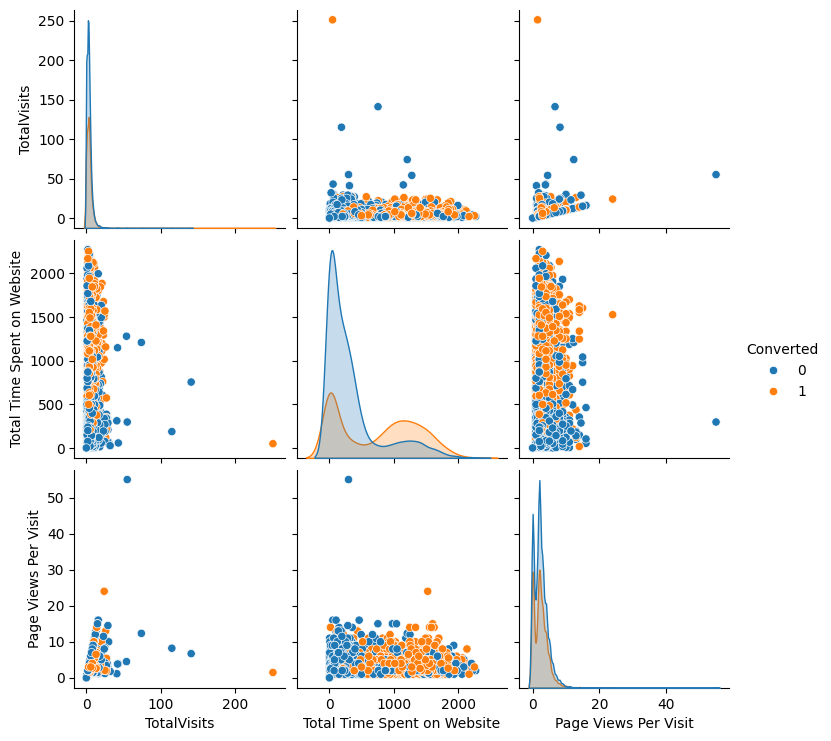

In [65]:
sns.pairplot(leadscore01,diag_kind='kde',hue='Converted')
plt.show()

#### Observations:
- Converted leads tend to visit less often but spend more time per visit
- Converted leads tend to visit less often but view more pages per visit

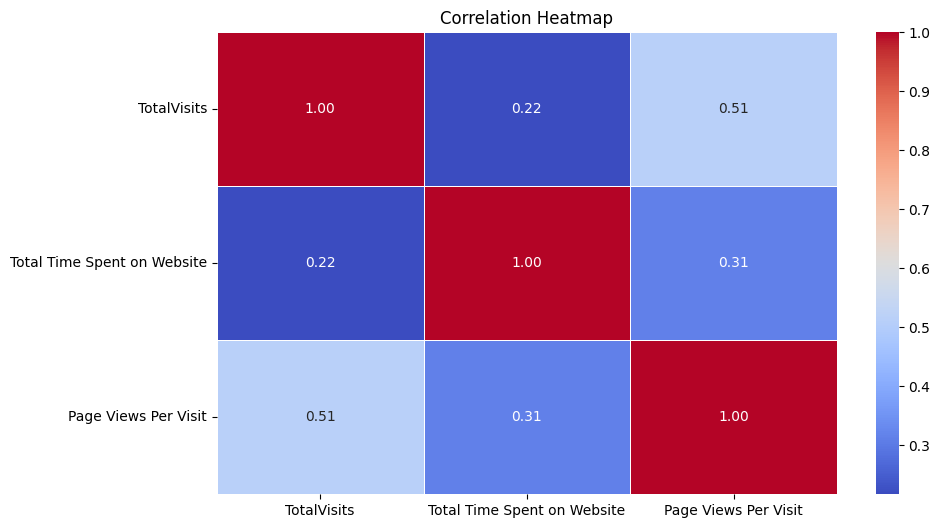

In [66]:
# Calculate the correlation matrix
corr = leadscore[['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']].corr()

# Plot the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Heatmap')
plt.show()

#### Observations:
- There is not much correlation between numerical variables

### Univariate Analysis

In [67]:
#defining function for selecting random colors for plots
def randomcolor():
    r = random.random()
    b = random.random()
    g = random.random()
    rgb = [r,g,b]
    return rgb

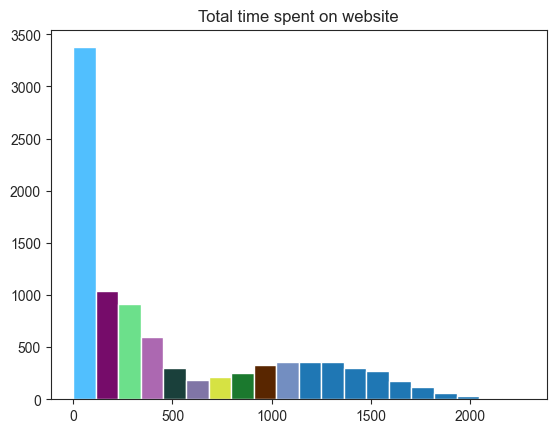

In [68]:
sns.set_style("ticks")
fig, ax = plt.subplots()
N,bins,patches = ax.hist(leadscore['Total Time Spent on Website'],bins=20)
for i in range(10):
    patches[i].set_facecolor(randomcolor())
plt.title("Total time spent on website")
plt.show()

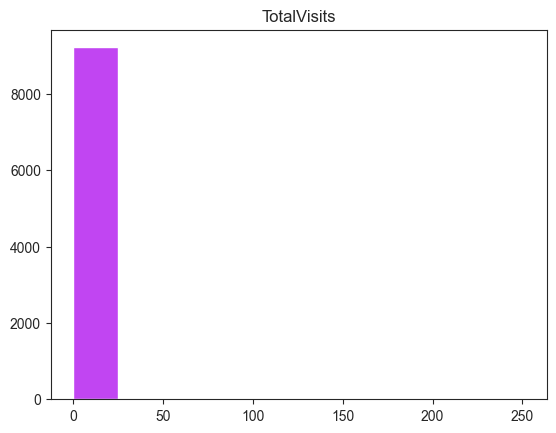

In [69]:
sns.set_style("ticks")
fig, ax = plt.subplots()
N,bins,patches = ax.hist(leadscore['TotalVisits'],bins=10)
for i in range(3):
    patches[i].set_facecolor(randomcolor())
plt.title("TotalVisits")
plt.show()

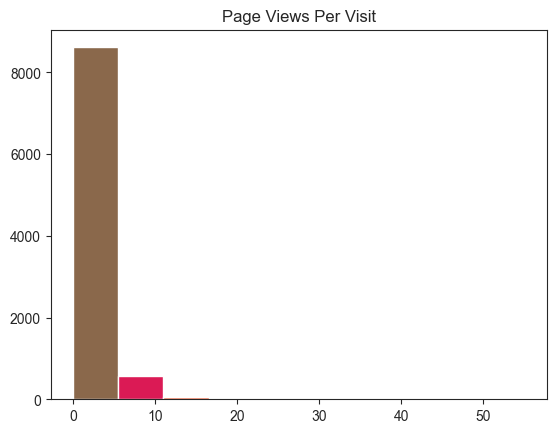

In [70]:
sns.set_style("ticks")
fig, ax = plt.subplots()
N,bins,patches = ax.hist(leadscore['Page Views Per Visit'],bins=10)
for i in range(3):
    patches[i].set_facecolor(randomcolor())
plt.title("Page Views Per Visit")
plt.show()

#### Numerical data seems to be highly skewed. It does not seem to be distributed normally which may lead to biased model predictions.

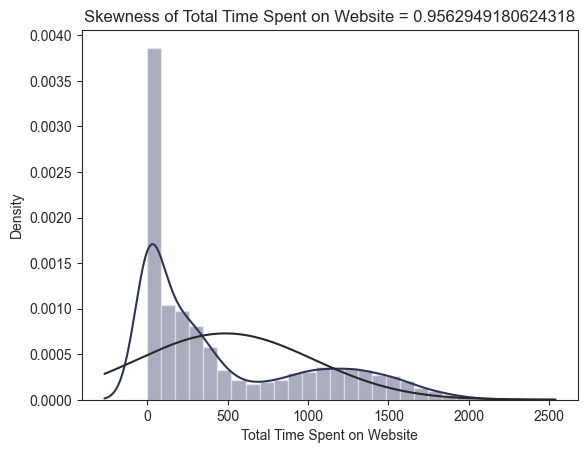

In [71]:
skewness = str(skew(leadscore['Total Time Spent on Website']))
sns.distplot(leadscore['Total Time Spent on Website'], fit = norm, color = randomcolor())
plt.title("Skewness of " + 'Total Time Spent on Website'+ ' = '+ skewness)
plt.show()

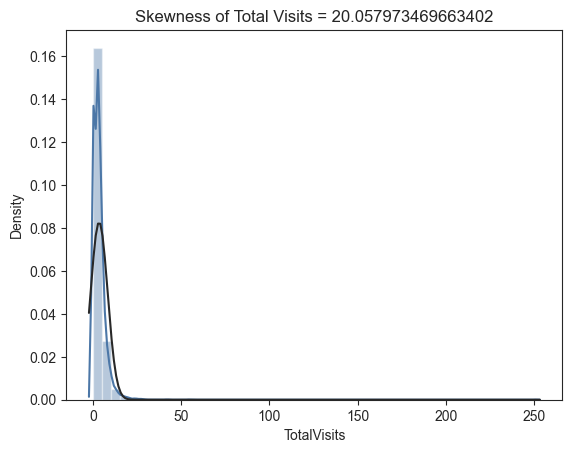

In [72]:
skewness = str(skew(leadscore['TotalVisits']))
sns.distplot(leadscore['TotalVisits'],fit = norm,color = randomcolor())
plt.title("Skewness of " + 'Total Visits'+ ' = '+ skewness)
plt.show()

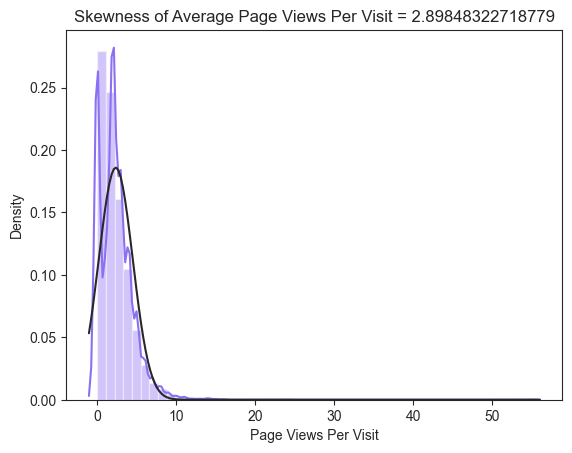

In [73]:
skewness = str(skew(leadscore['Page Views Per Visit']))
sns.distplot(leadscore['Page Views Per Visit'],fit = norm,color = randomcolor())
plt.title("Skewness of " + 'Average Page Views Per Visit'+ ' = '+ skewness)
plt.show()

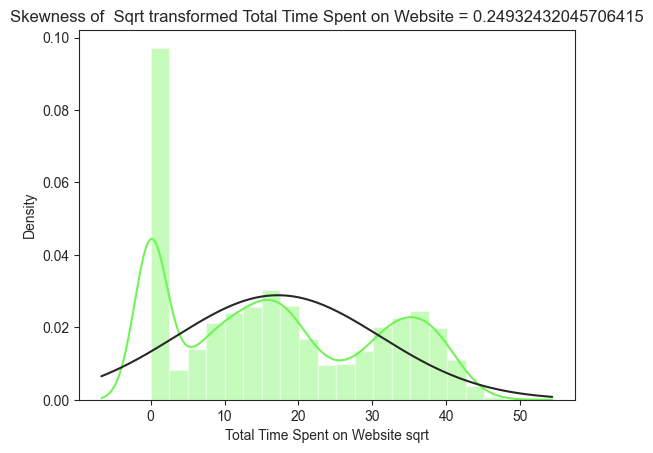

In [74]:
# Correcting skewness using square root transformation.

leadscore['Total Time Spent on Website sqrt'] = np.sqrt(leadscore['Total Time Spent on Website'])
skewness = str(skew(leadscore['Total Time Spent on Website sqrt']))
sns.distplot(leadscore['Total Time Spent on Website sqrt'],fit = norm,color = randomcolor())
plt.title("Skewness of " + ' Sqrt transformed Total Time Spent on Website'+ ' = '+ skewness)
plt.show()

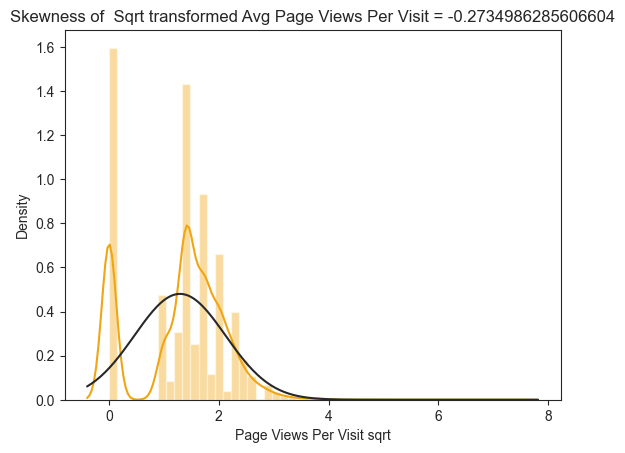

In [75]:
leadscore['Page Views Per Visit sqrt'] = np.sqrt(leadscore['Page Views Per Visit'])
skewness = str(skew(leadscore['Page Views Per Visit sqrt']))
sns.distplot(leadscore['Page Views Per Visit sqrt'],fit = norm,color = randomcolor())
plt.title("Skewness of " + ' Sqrt transformed Avg Page Views Per Visit'+ ' = '+ skewness)
plt.show()

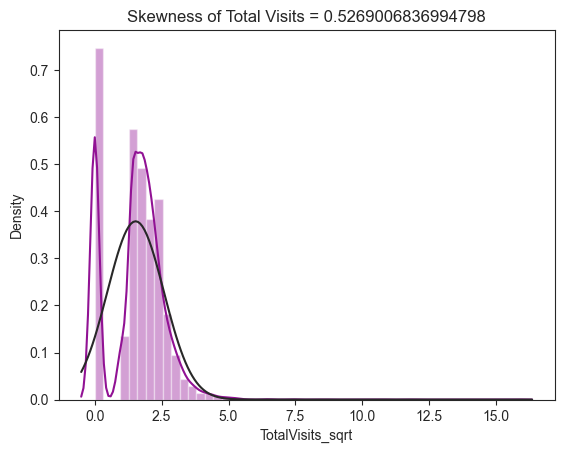

In [76]:
leadscore['TotalVisits_sqrt'] = np.sqrt(leadscore['TotalVisits'])
skewness = str(skew(leadscore['TotalVisits_sqrt']))
sns.distplot(leadscore['TotalVisits_sqrt'],fit = norm,color = randomcolor())
plt.title("Skewness of " + 'Total Visits'+ ' = '+ skewness)
plt.show()

#### We can clearly see that skewness in numerical columns has decreased significantly

In [77]:
# Lets remove the original numerical variables, since we have their transformed versions.
del leadscore['Page Views Per Visit']
del leadscore['Total Time Spent on Website']
del leadscore['TotalVisits']

In [78]:
leadscore.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Converted,Last Activity,Specialization,City,A free copy of Mastering The Interview,Last Notable Activity,Total Time Spent on Website sqrt,Page Views Per Visit sqrt,TotalVisits_sqrt
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,0,Page Visited on Website,Unknown,Unknown,No,Modified,0.000000,0.000000,0.000000
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,0,Email Opened,Unknown,Unknown,No,Email Opened,25.961510,1.581139,2.236068
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,1,Email Opened,Business Administration,Mumbai,Yes,Email Opened,39.140772,1.414214,1.414214
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,0,Unreachable,Media and Advertising,Mumbai,No,Modified,17.464249,1.000000,1.000000
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,1,Converted to Lead,Unknown,Mumbai,No,Modified,37.788887,1.000000,1.414214


#### Categorical Variable Analysis

In [79]:
#selecting categorical columns from the dataset.
leadscore.select_dtypes(include=['object'])

,Prospect ID,Lead Origin,Lead Source,Last Activity,Specialization,City,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,API,Olark Chat,Page Visited on Website,Unknown,Unknown,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,API,Organic Search,Email Opened,Unknown,Unknown,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,Landing Page Submission,Direct Traffic,Email Opened,Business Administration,Mumbai,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,Landing Page Submission,Direct Traffic,Unreachable,Media and Advertising,Mumbai,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,Landing Page Submission,Google,Converted to Lead,Unknown,Mumbai,No,Modified
...,...,...,...,...,...,...,...,...
9235,19d6451e-fcd6-407c-b83b-48e1af805ea9,Landing Page Submission,Direct Traffic,Email Marked Spam,IT Projects Management,Other International City,No,Email Marked Spam
9236,82a7005b-7196-4d56-95ce-a79f937a158d,Landing Page Submission,Direct Traffic,SMS Sent,Media and Advertising,Mumbai,Yes,SMS Sent
9237,aac550fe-a586-452d-8d3c-f1b62c94e02c,Landing Page Submission,Direct Traffic,SMS Sent,Business Administration,Mumbai,Yes,SMS Sent
9238,5330a7d1-2f2b-4df4-85d6-64ca2f6b95b9,Landing Page Submission,Google,SMS Sent,Human Resource Management,Other Metro Cities,No,SMS Sent


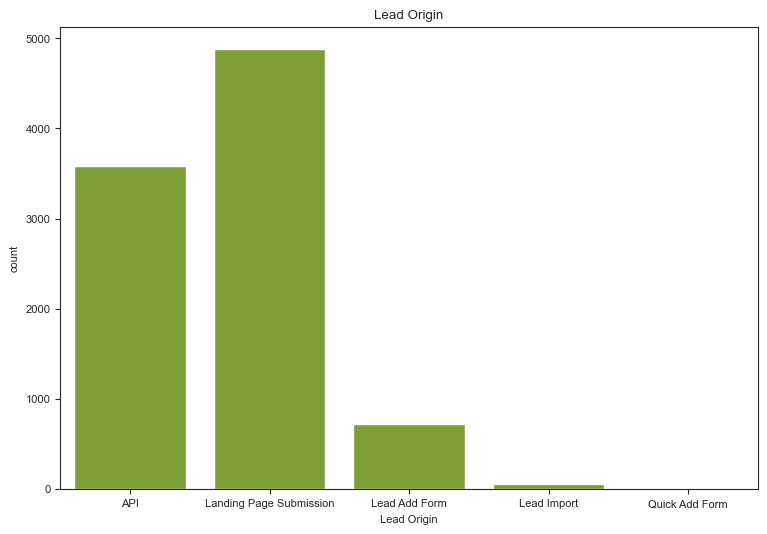

In [80]:
#bar chart counting number of leads by origin.
plt.figure(figsize=(9,6))
plt.rcParams.update({'font.size': 8})
sns.countplot(x=leadscore['Lead Origin'],color = randomcolor()).set_title('Lead Origin')
plt.show()

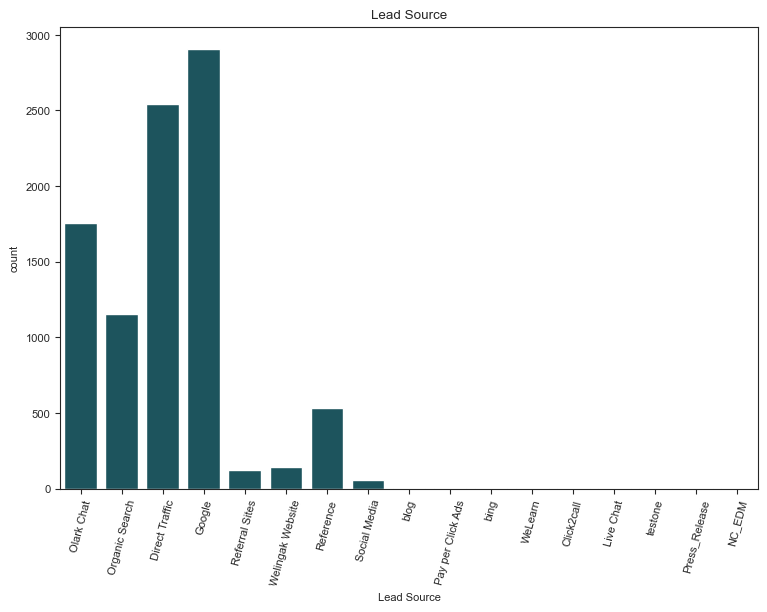

In [81]:
#bar chart counting number of leads by Lead Source.
plt.figure(figsize=(9,6))
plt.rcParams.update({'font.size': 8})
sns.countplot(x=leadscore['Lead Source'],color = randomcolor()).set_title('Lead Source')
plt.xticks(rotation=75)
plt.show()

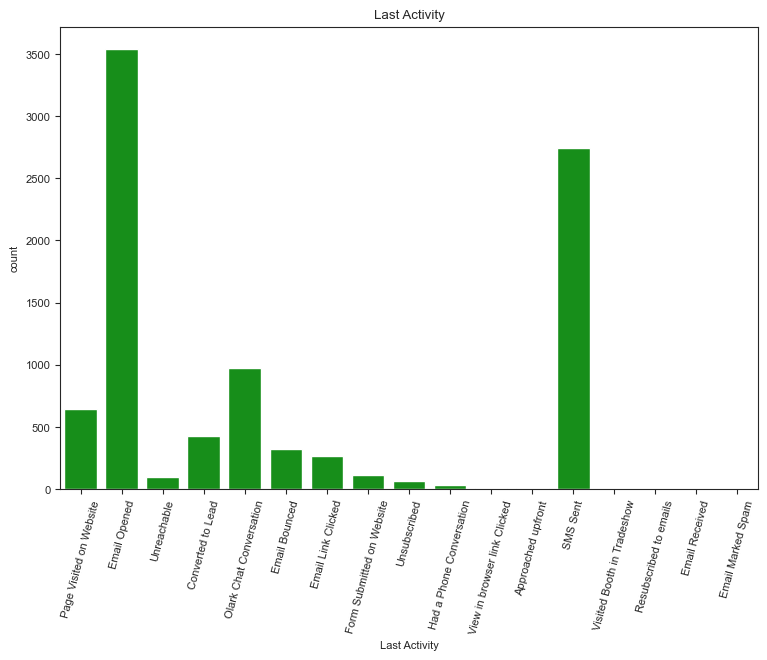

In [82]:
#bar chart counting number of leads by Last Activity.
plt.figure(figsize=(9,6))
plt.rcParams.update({'font.size': 8})
sns.countplot(x=leadscore['Last Activity'],color = randomcolor()).set_title('Last Activity')
plt.xticks(rotation=75)
plt.show()

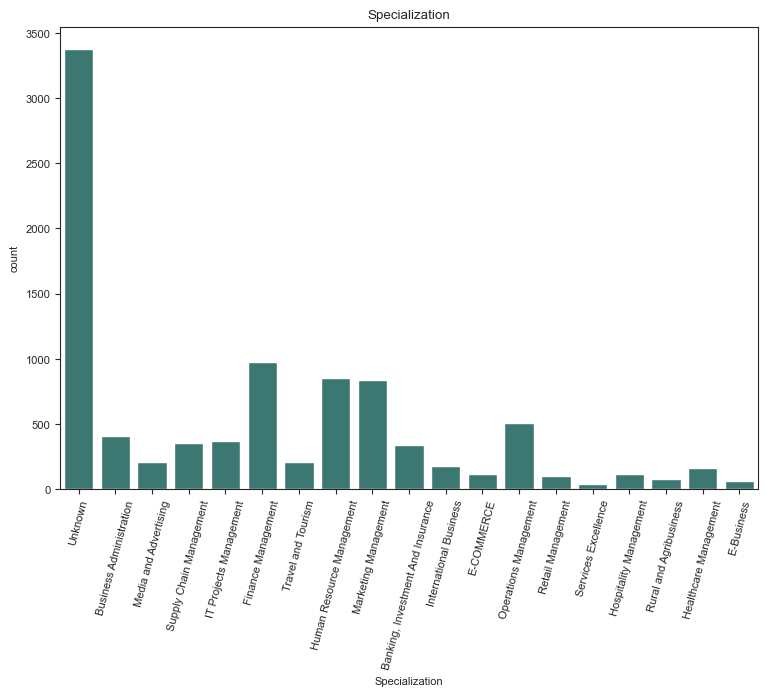

In [83]:
#bar chart counting number of leads by Specialization.
plt.figure(figsize=(9,6))
plt.rcParams.update({'font.size': 8})
sns.countplot(x=leadscore['Specialization'],color = randomcolor()).set_title('Specialization')
plt.xticks(rotation=75)
plt.show()

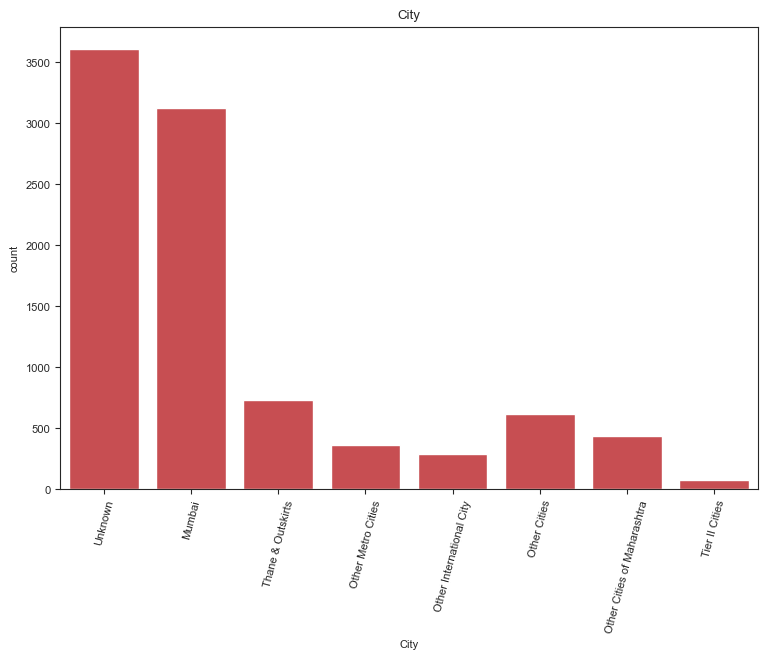

In [84]:
#bar chart counting number of leads by City.
plt.figure(figsize=(9,6))
plt.rcParams.update({'font.size': 8})
sns.countplot(x=leadscore['City'],color = randomcolor()).set_title('City')
plt.xticks(rotation=75)
plt.show()

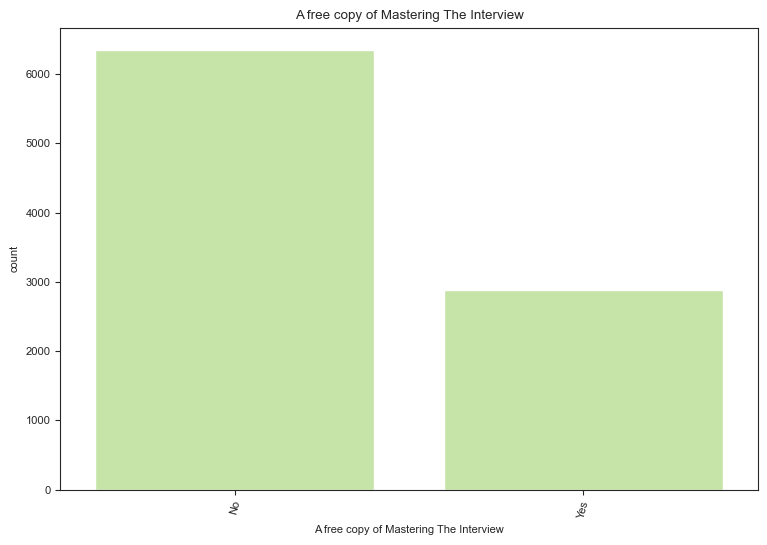

In [85]:
#bar chart counting number of leads by A free copy of Mastering The Interview.
plt.figure(figsize=(9,6))
plt.rcParams.update({'font.size': 8})
sns.countplot(x=leadscore['A free copy of Mastering The Interview'],color = randomcolor()).set_title('A free copy of Mastering The Interview')
plt.xticks(rotation=75)
plt.show()

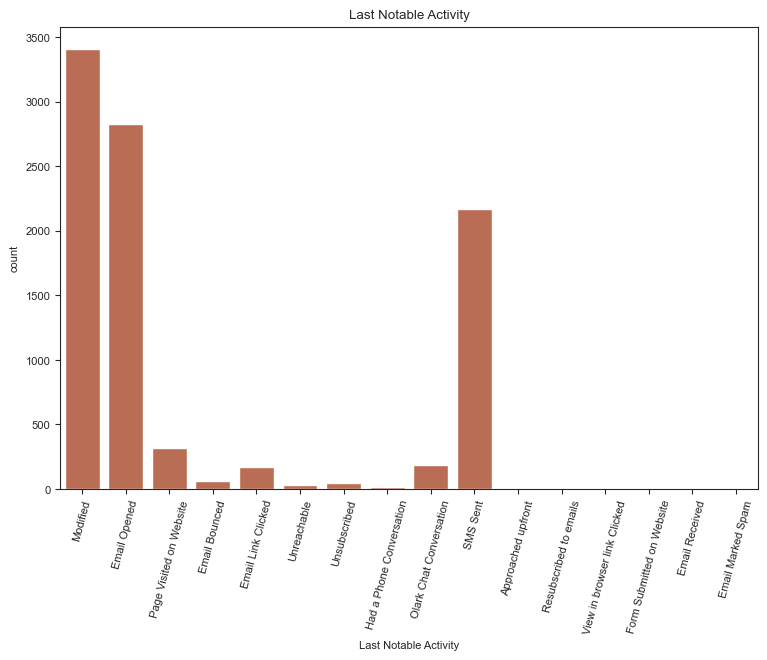

In [86]:
#bar chart counting number of leads by A free copy of Mastering The Interview.
plt.figure(figsize=(9,6))
plt.rcParams.update({'font.size': 8})
sns.countplot(x=leadscore['Last Notable Activity'],color = randomcolor()).set_title('Last Notable Activity')
plt.xticks(rotation=75)
plt.show()

### Category wise conversion rate

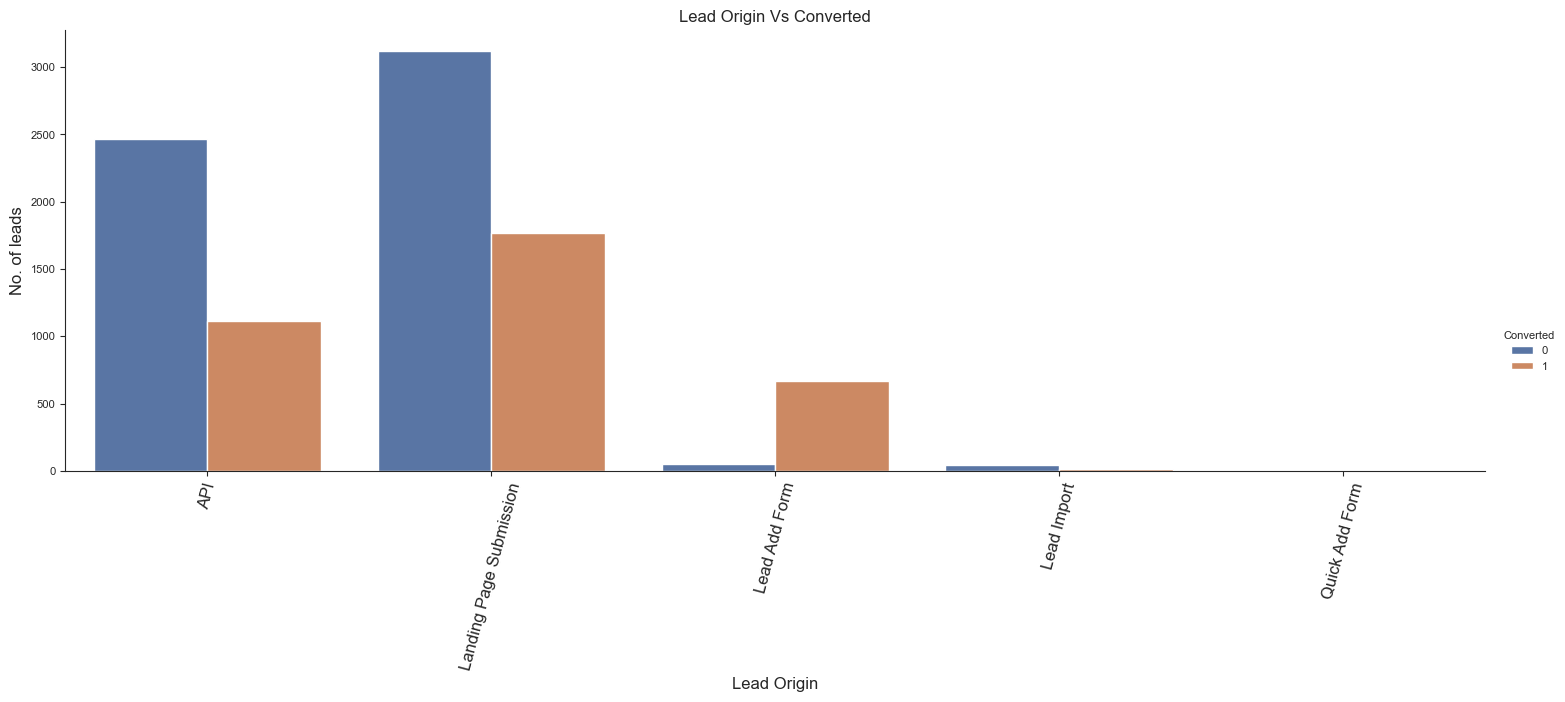

In [87]:
plot = sns.catplot(x="Lead Origin", hue="Converted", kind="count", data=leadscore, palette="deep", aspect=3)
plt.title('Lead Origin Vs Converted', fontsize=12)
plt.xlabel("Lead Origin", fontsize=12)
plt.ylabel("No. of leads", fontsize=12)
plt.xticks(rotation=75, fontsize=12)
plt.show()


#### Landing Page Submission contributes most to both the categories.

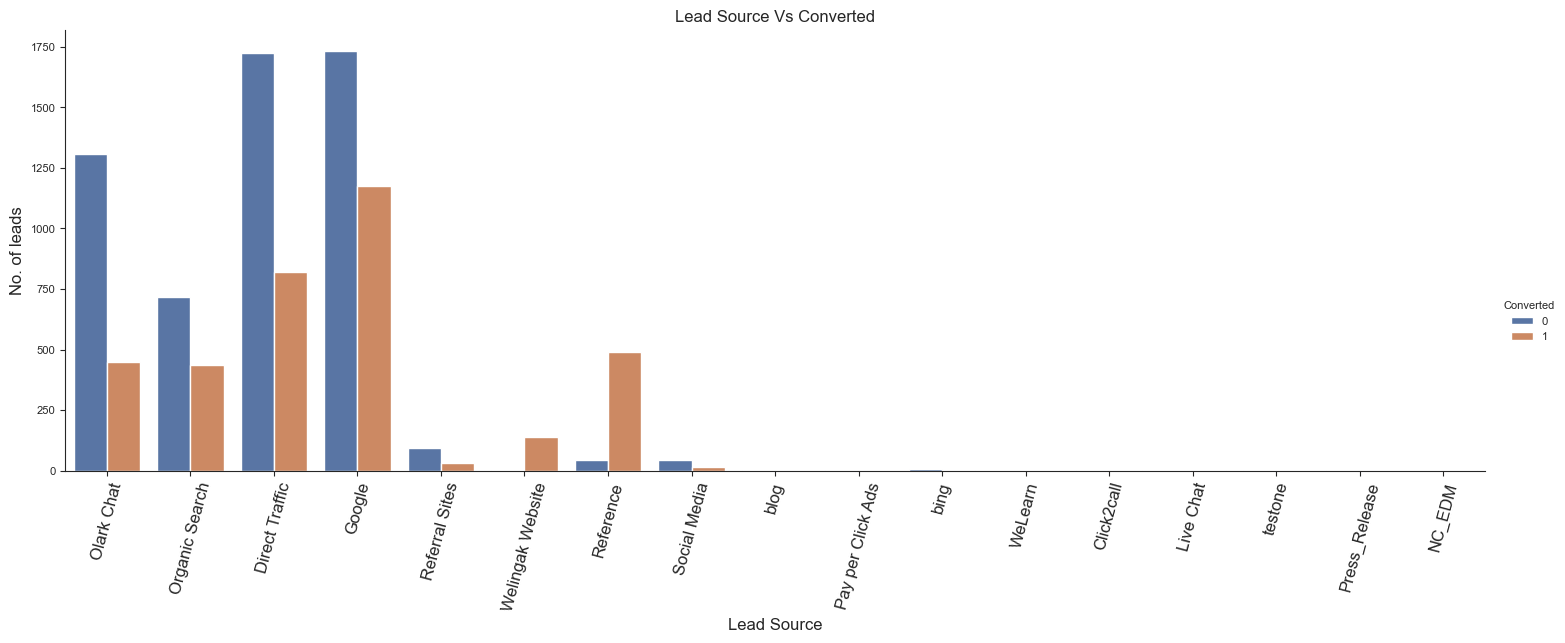

In [88]:
plot = sns.catplot(x="Lead Source", hue="Converted", kind="count", data=leadscore, palette="deep", aspect=3)
plt.title('Lead Source Vs Converted', fontsize=12)
plt.xlabel("Lead Source", fontsize=12)
plt.ylabel("No. of leads", fontsize=12)
plt.xticks(rotation=75, fontsize=12)
plt.show()

#### Most converted leads come from Google

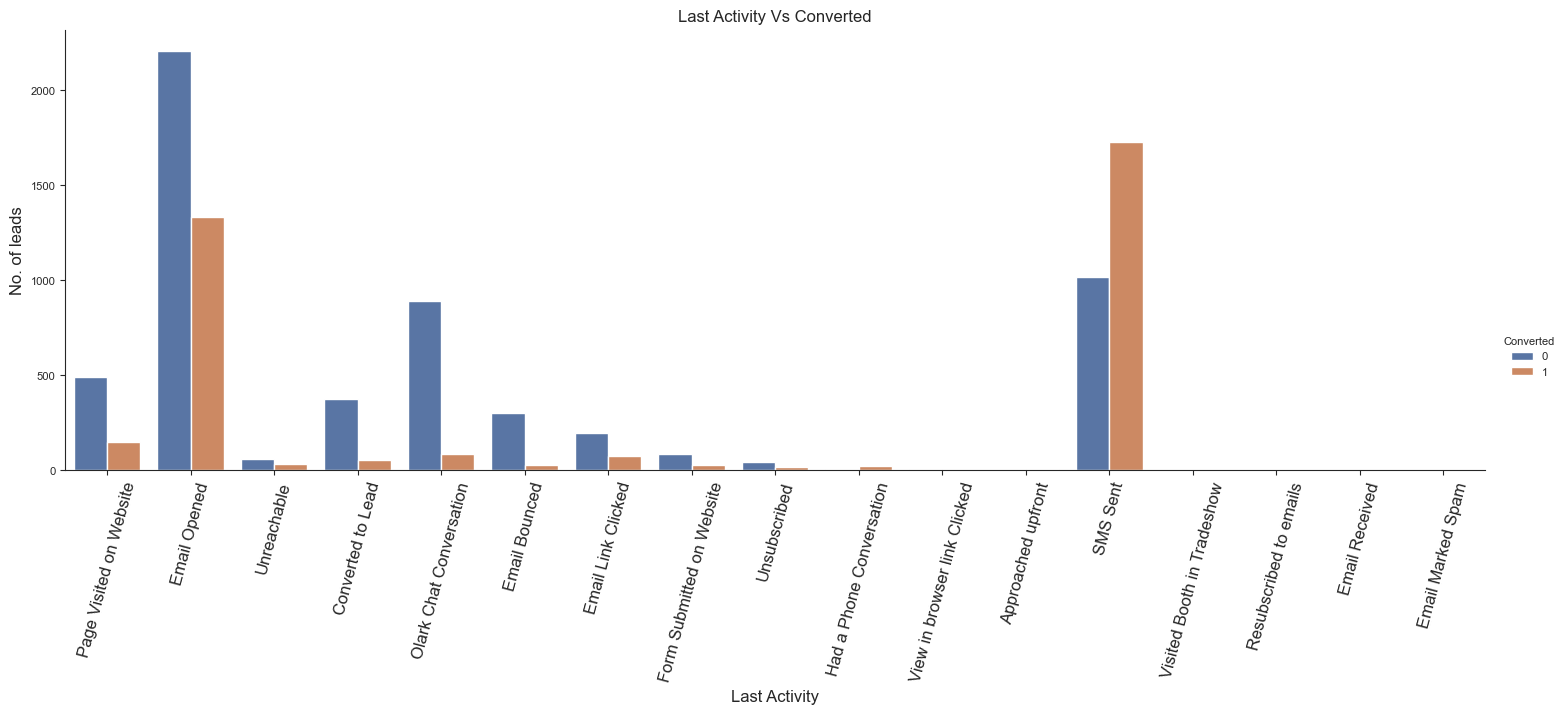

In [89]:
plot = sns.catplot(x="Last Activity", hue="Converted", kind="count", data=leadscore, palette="deep", aspect=3)
plt.title('Last Activity Vs Converted', fontsize=12)
plt.xlabel("Last Activity", fontsize=12)
plt.ylabel("No. of leads", fontsize=12)
plt.xticks(rotation=75, fontsize=12)
plt.show()

#### Most converted leads in Last Activity was 'SMS Sent'

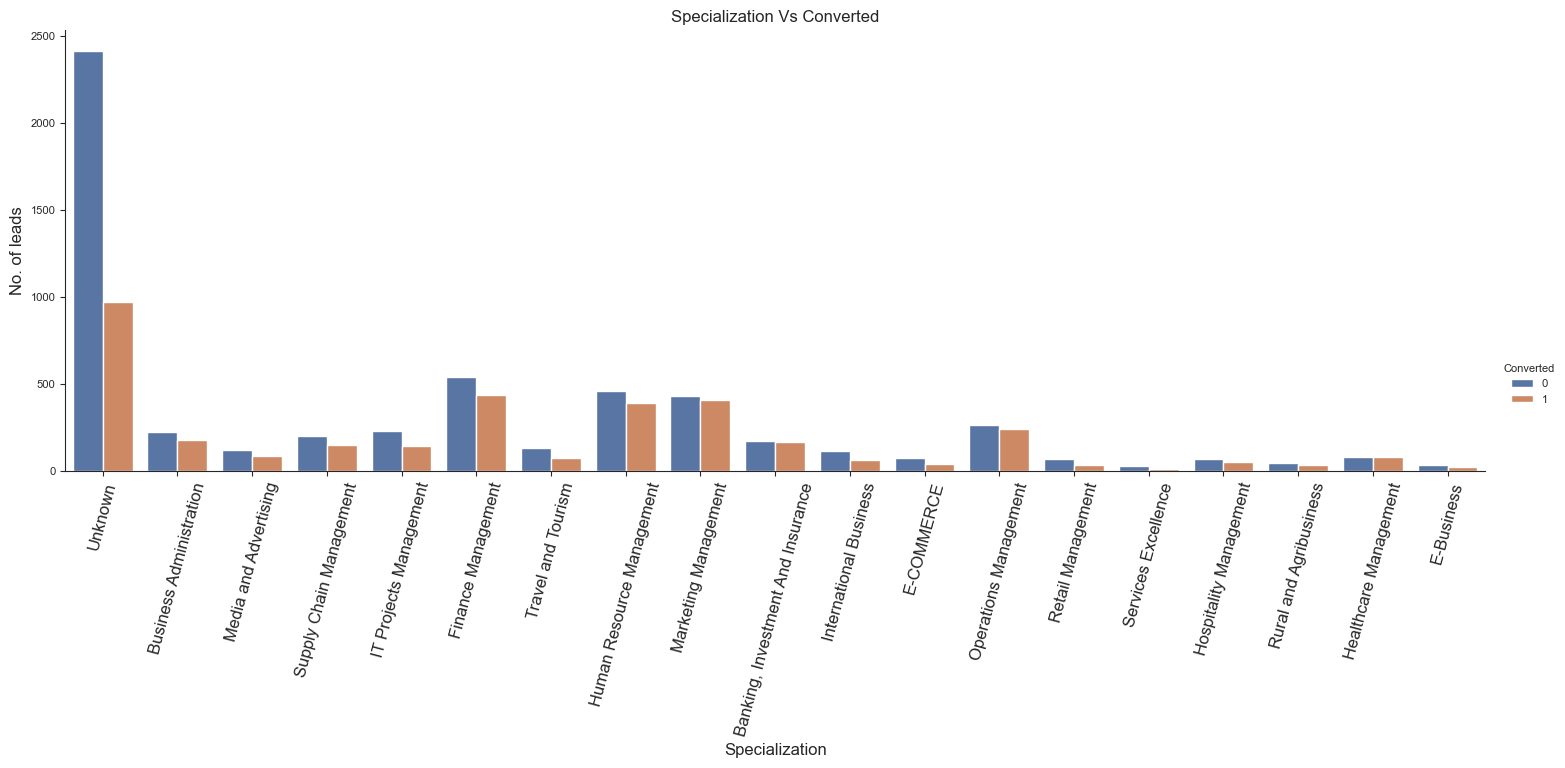

In [90]:
plot = sns.catplot(x="Specialization", hue="Converted", kind="count", data=leadscore, palette="deep", aspect=3)
plt.title('Specialization Vs Converted', fontsize=12)
plt.xlabel("Specialization", fontsize=12)
plt.ylabel("No. of leads", fontsize=12)
plt.xticks(rotation=75, fontsize=12)
plt.show()

#### Most converted leads in Specialisation are from Finance Management

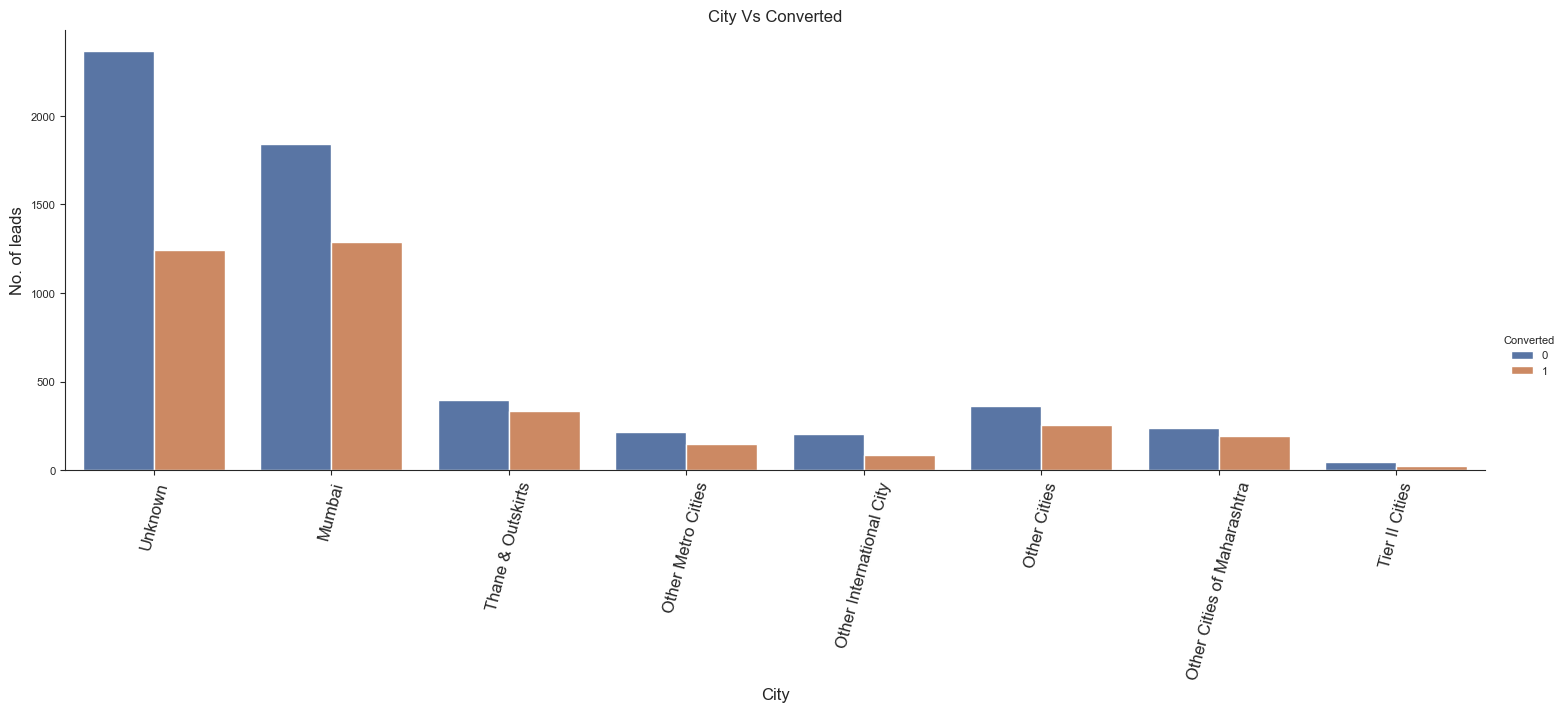

In [91]:
plot = sns.catplot(x="City", hue="Converted", kind="count", data=leadscore, palette="deep", aspect=3)
plt.title('City Vs Converted', fontsize=12)
plt.xlabel("City", fontsize=12)
plt.ylabel("No. of leads", fontsize=12)
plt.xticks(rotation=75, fontsize=12)
plt.show()

#### Most converted leads in city are from Mumbai

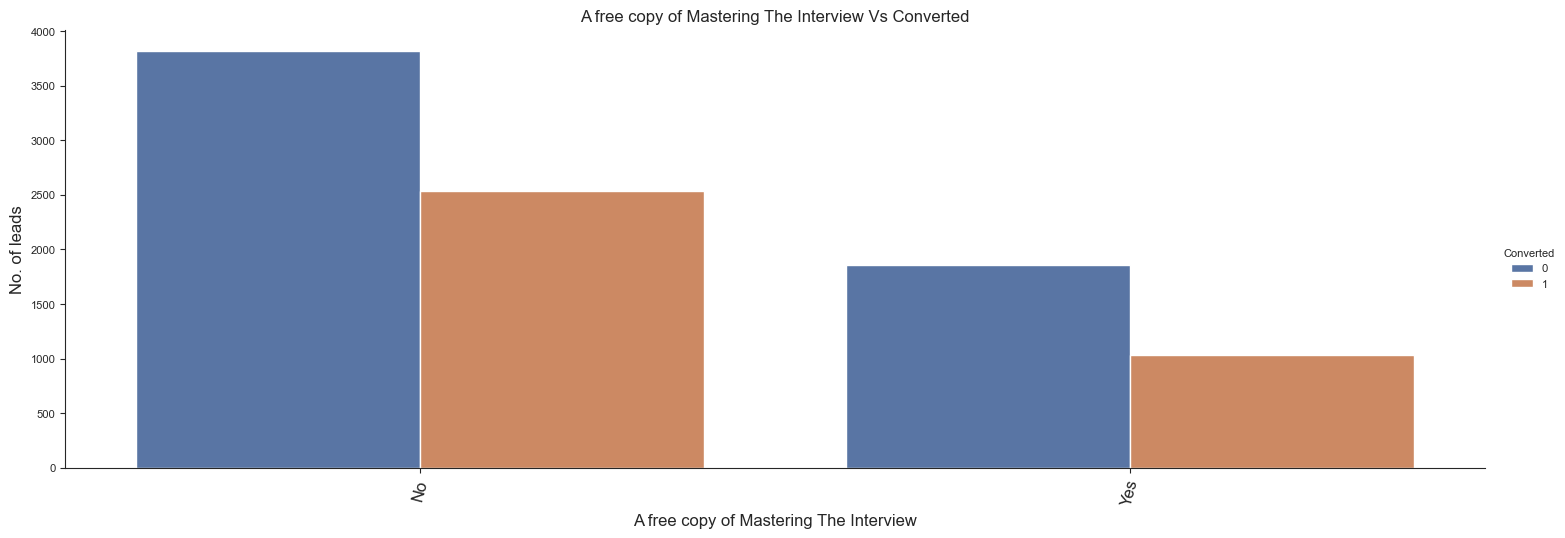

In [92]:
plot = sns.catplot(x="A free copy of Mastering The Interview", hue="Converted", kind="count", data=leadscore, palette="deep", aspect=3)
plt.title('A free copy of Mastering The Interview Vs Converted', fontsize=12)
plt.xlabel("A free copy of Mastering The Interview", fontsize=12)
plt.ylabel("No. of leads", fontsize=12)
plt.xticks(rotation=75, fontsize=12)
plt.show()

#### People not taking the free copy of mastering the interview are more likely to convert than those who've taken the free book.

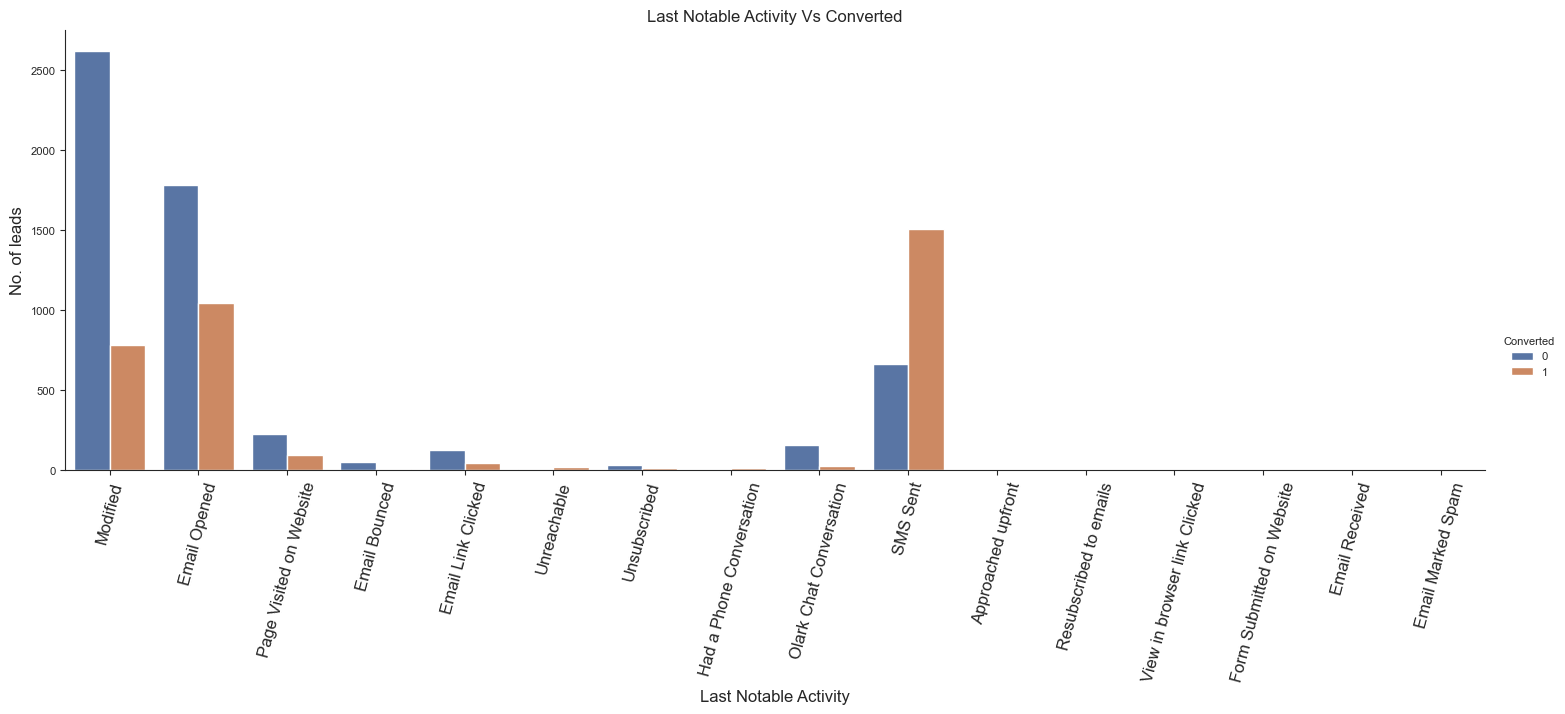

In [93]:
plot = sns.catplot(x="Last Notable Activity", hue="Converted", kind="count", data=leadscore, palette="deep", aspect=3)
plt.title('Last Notable Activity Vs Converted', fontsize=12)
plt.xlabel("Last Notable Activity", fontsize=12)
plt.ylabel("No. of leads", fontsize=12)
plt.xticks(rotation=75, fontsize=12)
plt.show()

#### Most converted leads have last notable activity as 'SMS Sent'

### Outlier Analysis

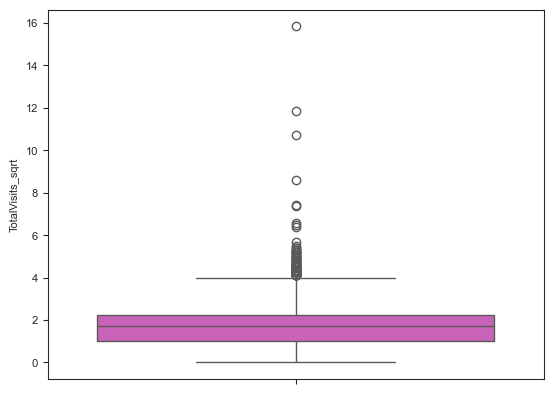

In [94]:
#checking the spread of the numerical variables.
sns.boxplot(leadscore['TotalVisits_sqrt'],color=randomcolor())
plt.show()

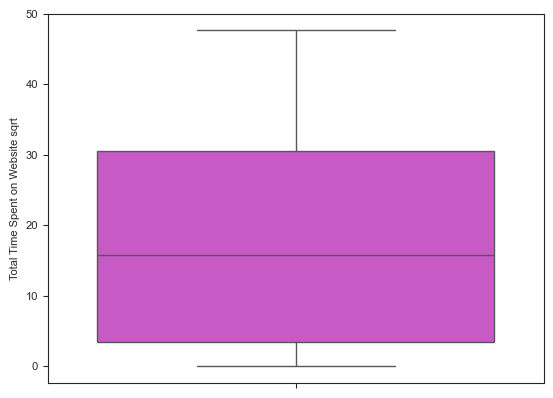

In [95]:
sns.boxplot(leadscore['Total Time Spent on Website sqrt'],color=randomcolor())
plt.show()

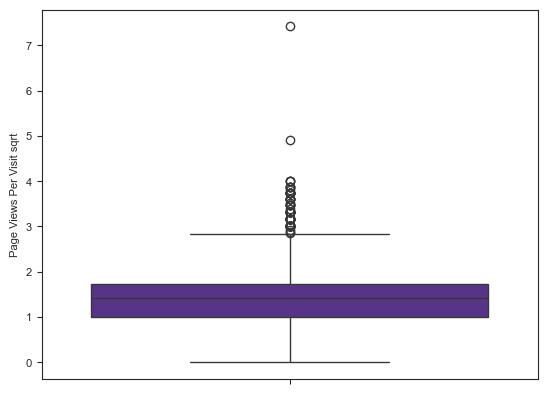

In [96]:
sns.boxplot(leadscore['Page Views Per Visit sqrt'],color=randomcolor())
plt.show()

In [97]:
leadscore.shape

(9240, 13)

#### In above steps we have reduced the skewness of the data and it now more closely resembles a normal distribution.
#### In a normal distribution, 99.7% of the data is contained within +-3 SD of the mean. We can use this to cut down on outliers.

In [98]:
out_num_leadscore=leadscore[['Page Views Per Visit sqrt','TotalVisits_sqrt']]
other_leadscore = pd.concat([leadscore.select_dtypes(include=['object']),leadscore['Total Time Spent on Website sqrt']],axis =1)
other_leadscore = pd.concat([other_leadscore,leadscore["Lead Number"],leadscore['Converted']],axis = 1)

q = out_num_leadscore.quantile(0.997)
out_num_leadscore = out_num_leadscore[out_num_leadscore < q]
out_num_leadscore.isnull().sum()

Page Views Per Visit sqrt    31
TotalVisits_sqrt             32
dtype: int64

In [99]:
# Filling missing values by median

out_num_leadscore['Page Views Per Visit sqrt'].fillna(out_num_leadscore['Page Views Per Visit sqrt'].median(), inplace=True)
out_num_leadscore['TotalVisits_sqrt'].fillna(out_num_leadscore['TotalVisits_sqrt'].median(), inplace=True)

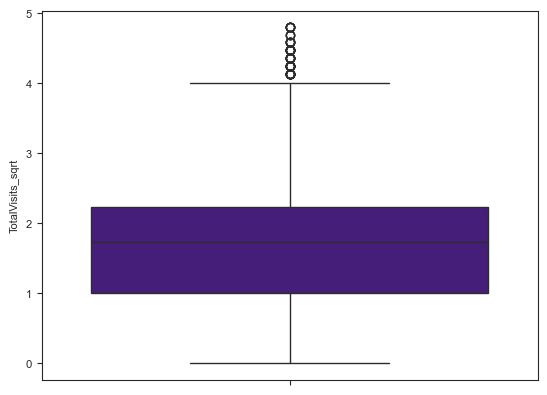

In [100]:
sns.boxplot(out_num_leadscore['TotalVisits_sqrt'],color=randomcolor())
plt.show()

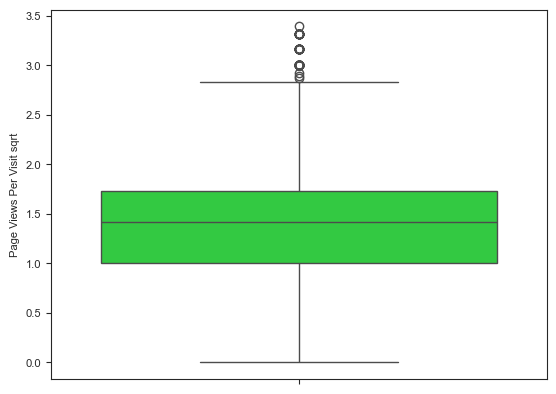

In [101]:
sns.boxplot(out_num_leadscore['Page Views Per Visit sqrt'],color=randomcolor())
plt.show()

#### First iteration of the process didn't remove as many outlying points as expected. lets go for second iteration.

In [102]:
q = out_num_leadscore.quantile(0.997)
out_num_leadscore = out_num_leadscore[out_num_leadscore < q]
out_num_leadscore.isnull().sum()

Page Views Per Visit sqrt    44
TotalVisits_sqrt             36
dtype: int64

In [103]:
# Filling missing values by median

out_num_leadscore['Page Views Per Visit sqrt'].fillna(out_num_leadscore['Page Views Per Visit sqrt'].median(), inplace=True)
out_num_leadscore['TotalVisits_sqrt'].fillna(out_num_leadscore['TotalVisits_sqrt'].median(), inplace=True)

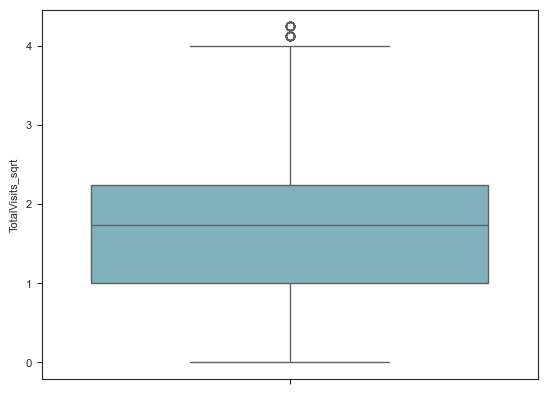

In [104]:
sns.boxplot(out_num_leadscore['TotalVisits_sqrt'],color=randomcolor())
plt.show()

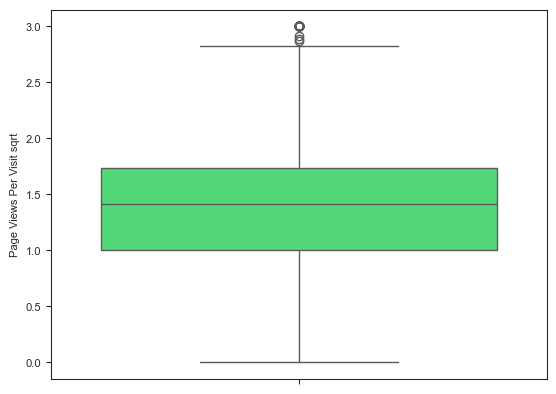

In [105]:
sns.boxplot(out_num_leadscore['Page Views Per Visit sqrt'],color=randomcolor())
plt.show()

#### Lets stop here as not many outliers are left we might risk loosing non outlying values

In [106]:
cleaned_leadscore=pd.concat([other_leadscore,out_num_leadscore],axis = 1)
cleaned_leadscore.head()

,Prospect ID,Lead Origin,Lead Source,Last Activity,Specialization,City,A free copy of Mastering The Interview,Last Notable Activity,Total Time Spent on Website sqrt,Lead Number,Converted,Page Views Per Visit sqrt,TotalVisits_sqrt
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,API,Olark Chat,Page Visited on Website,Unknown,Unknown,No,Modified,0.000000,660737,0,0.000000,0.000000
1,2a272436-5132-4136-86fa-dcc88c88f482,API,Organic Search,Email Opened,Unknown,Unknown,No,Email Opened,25.961510,660728,0,1.581139,2.236068
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,Landing Page Submission,Direct Traffic,Email Opened,Business Administration,Mumbai,Yes,Email Opened,39.140772,660727,1,1.414214,1.414214
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,Landing Page Submission,Direct Traffic,Unreachable,Media and Advertising,Mumbai,No,Modified,17.464249,660719,0,1.000000,1.000000
4,3256f628-e534-4826-9d63-4a8b88782852,Landing Page Submission,Google,Converted to Lead,Unknown,Mumbai,No,Modified,37.788887,660681,1,1.000000,1.414214


In [107]:
cleaned_leadscore.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 13 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Prospect ID                             9240 non-null   object 
 1   Lead Origin                             9240 non-null   object 
 2   Lead Source                             9240 non-null   object 
 3   Last Activity                           9240 non-null   object 
 4   Specialization                          9240 non-null   object 
 5   City                                    9240 non-null   object 
 6   A free copy of Mastering The Interview  9240 non-null   object 
 7   Last Notable Activity                   9240 non-null   object 
 8   Total Time Spent on Website sqrt        9240 non-null   float64
 9   Lead Number                             9240 non-null   int64  
 10  Converted                               9240 non-null   int6

## Data Preparation

#### Converting some binary variables (Yes/No) to 0/1

In [108]:
# List of variables to map
varlist =  ['A free copy of Mastering The Interview']

# Defining the map function
def binary_map(x):
    return x.map({'Yes': 1, "No": 0})

# Applying the function to the housing list
cleaned_leadscore[varlist] = cleaned_leadscore[varlist].apply(binary_map)

In [109]:
cleaned_leadscore.head()

,Prospect ID,Lead Origin,Lead Source,Last Activity,Specialization,City,A free copy of Mastering The Interview,Last Notable Activity,Total Time Spent on Website sqrt,Lead Number,Converted,Page Views Per Visit sqrt,TotalVisits_sqrt
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,API,Olark Chat,Page Visited on Website,Unknown,Unknown,0,Modified,0.000000,660737,0,0.000000,0.000000
1,2a272436-5132-4136-86fa-dcc88c88f482,API,Organic Search,Email Opened,Unknown,Unknown,0,Email Opened,25.961510,660728,0,1.581139,2.236068
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,Landing Page Submission,Direct Traffic,Email Opened,Business Administration,Mumbai,1,Email Opened,39.140772,660727,1,1.414214,1.414214
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,Landing Page Submission,Direct Traffic,Unreachable,Media and Advertising,Mumbai,0,Modified,17.464249,660719,0,1.000000,1.000000
4,3256f628-e534-4826-9d63-4a8b88782852,Landing Page Submission,Google,Converted to Lead,Unknown,Mumbai,0,Modified,37.788887,660681,1,1.000000,1.414214


#### For categorical variables with multiple levels, create dummy features (one-hot encoded)

In [110]:
#importing required modules
from sklearn.preprocessing import OneHotEncoder

In [111]:
#removing ID variable from variables whose dummies are being created.
dummies_needed=cleaned_leadscore.drop("Prospect ID",axis=1).select_dtypes(include=['object'])
dummies_needed.columns

Index(['Lead Origin', 'Lead Source', 'Last Activity', 'Specialization', 'City',
       'Last Notable Activity'],
      dtype='object')

In [112]:
# Creating a dummy variable for some of the categorical variables and dropping the first one.
dummy1 = pd.get_dummies(cleaned_leadscore[['Lead Origin', 'Lead Source', 'Last Activity', 'Specialization', 'City',
       'Last Notable Activity']], dtype=int, drop_first=True)

# Adding the results to the master dataframe
cleaned_leadscore = pd.concat([cleaned_leadscore, dummy1], axis=1)

In [113]:
cleaned_leadscore.head()

,Prospect ID,Lead Origin,Lead Source,Last Activity,Specialization,City,A free copy of Mastering The Interview,Last Notable Activity,Total Time Spent on Website sqrt,Lead Number,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,API,Olark Chat,Page Visited on Website,Unknown,Unknown,0,Modified,0.000000,660737,...,0,0,1,0,0,0,0,0,0,0
1,2a272436-5132-4136-86fa-dcc88c88f482,API,Organic Search,Email Opened,Unknown,Unknown,0,Email Opened,25.961510,660728,...,0,0,0,0,0,0,0,0,0,0
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,Landing Page Submission,Direct Traffic,Email Opened,Business Administration,Mumbai,1,Email Opened,39.140772,660727,...,0,0,0,0,0,0,0,0,0,0
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,Landing Page Submission,Direct Traffic,Unreachable,Media and Advertising,Mumbai,0,Modified,17.464249,660719,...,0,0,1,0,0,0,0,0,0,0
4,3256f628-e534-4826-9d63-4a8b88782852,Landing Page Submission,Google,Converted to Lead,Unknown,Mumbai,0,Modified,37.788887,660681,...,0,0,1,0,0,0,0,0,0,0


In [114]:
cleaned_leadscore.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 89 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   Prospect ID                                         9240 non-null   object 
 1   Lead Origin                                         9240 non-null   object 
 2   Lead Source                                         9240 non-null   object 
 3   Last Activity                                       9240 non-null   object 
 4   Specialization                                      9240 non-null   object 
 5   City                                                9240 non-null   object 
 6   A free copy of Mastering The Interview              9240 non-null   int64  
 7   Last Notable Activity                               9240 non-null   object 
 8   Total Time Spent on Website sqrt                    9240 non-null   float64
 9

In [115]:
# We have created dummies for the below variables, so we can drop them
cleaned_leadscore = cleaned_leadscore.drop(['Lead Origin', 'Lead Source', 'Last Activity', 'Specialization', 'City',
       'Last Notable Activity'], axis=1)

In [116]:
cleaned_leadscore.head()

,Prospect ID,A free copy of Mastering The Interview,Total Time Spent on Website sqrt,Lead Number,Converted,Page Views Per Visit sqrt,TotalVisits_sqrt,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,0,0.000000,660737,0,0.000000,0.000000,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,2a272436-5132-4136-86fa-dcc88c88f482,0,25.961510,660728,0,1.581139,2.236068,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,1,39.140772,660727,1,1.414214,1.414214,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,0,17.464249,660719,0,1.000000,1.000000,1,0,0,...,0,0,1,0,0,0,0,0,0,0
4,3256f628-e534-4826-9d63-4a8b88782852,0,37.788887,660681,1,1.000000,1.414214,1,0,0,...,0,0,1,0,0,0,0,0,0,0


#### Steps for modal building. Test-Train Split
- Create X and Y
- Create train and test sets (70-30, 80-20)
- Train your modal on the training set (i.e. learn the coefficients)
- Evaluate the model (training set, test set)

In [117]:
import statsmodels
import statsmodels.api as sm
import sklearn
from sklearn.model_selection import train_test_split

In [118]:
# Create X and y
#Putting feature variable to X
X = cleaned_leadscore.drop(['Prospect ID','Converted'],axis=1)
X.head()

,A free copy of Mastering The Interview,Total Time Spent on Website sqrt,Lead Number,Page Views Per Visit sqrt,TotalVisits_sqrt,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Direct Traffic,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,0,0.000000,660737,0.000000,0.000000,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,0,25.961510,660728,1.581139,2.236068,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,39.140772,660727,1.414214,1.414214,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,0,17.464249,660719,1.000000,1.000000,1,0,0,0,1,...,0,0,1,0,0,0,0,0,0,0
4,0,37.788887,660681,1.000000,1.414214,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [119]:
# Putting response variable to y
y = cleaned_leadscore['Converted']
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [120]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=40)

In [121]:
X_train.head()

,A free copy of Mastering The Interview,Total Time Spent on Website sqrt,Lead Number,Page Views Per Visit sqrt,TotalVisits_sqrt,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Direct Traffic,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
8432,0,41.291646,585443,1.414214,1.414214,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
7547,0,35.986108,591718,1.813836,1.732051,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2218,1,17.058722,638283,1.732051,1.732051,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
7654,1,9.797959,591094,1.414214,1.414214,1,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
7127,1,16.031220,594796,2.000000,2.828427,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Scaling Feature 

In [122]:
from sklearn.preprocessing import StandardScaler

In [123]:
scaler = StandardScaler()

X_train[['Total Time Spent on Website sqrt','Page Views Per Visit sqrt','TotalVisits_sqrt']] = scaler.fit_transform(X_train[['Total Time Spent on Website sqrt','Page Views Per Visit sqrt','TotalVisits_sqrt']])

X_train.head()

,A free copy of Mastering The Interview,Total Time Spent on Website sqrt,Lead Number,Page Views Per Visit sqrt,TotalVisits_sqrt,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Direct Traffic,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
8432,0,1.740812,585443,0.176048,-0.087404,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
7547,0,1.356293,591718,0.673967,0.233705,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2218,1,-0.015470,638283,0.572065,0.233705,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
7654,1,-0.541694,591094,0.176048,-0.087404,1,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
7127,1,-0.089938,594796,0.905923,1.341365,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [124]:
### Checking the Converted Rate
Lead_Converted_Rate = (sum(cleaned_leadscore['Converted'])/len(cleaned_leadscore['Converted'].index))*100
Lead_Converted_Rate

38.53896103896104

#### We have 38% lead conversion rate

In [125]:
import statsmodels.api as sm

In [126]:
# Logistic regression model
logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6394
Model Family:                Binomial   Df Model:                           73
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2761.7
Date:                Mon, 15 Apr 2024   Deviance:                       5523.4
Time:                        01:51:23   Pearson chi2:                 6.63e+03
No. Iterations:                    22   Pseudo R-squ. (CS):             0.3803
Covariance Type:            nonrobust                                         
======================================================================================================================
                                                         coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------------------
const                                                 15.6454   7.95e+04      0.000      1.000   -1.56e+05    1.56e+05
A free copy of Mastering The Interview                -0.2709      0.106     -2.554      0.011      -0.479      -0.063
Total Time Spent on Website sqrt                       1.2954      0.048     26.915      0.000       1.201       1.390
Lead Number                                         9.758e-06   1.54e-06      6.342      0.000    6.74e-06    1.28e-05
Page Views Per Visit sqrt                             -0.7784      0.087     -8.996      0.000      -0.948      -0.609
TotalVisits_sqrt                                       0.2119      0.074      2.880      0.004       0.068       0.356
Lead Origin_Landing Page Submission                   -1.1726      0.147     -7.994      0.000      -1.460      -0.885
Lead Origin_Lead Add Form                              2.8038      0.606      4.626      0.000       1.616       3.992
Lead Origin_Lead Import                               -0.9022      1.292     -0.698      0.485      -3.434       1.629
Lead Origin_Quick Add Form                          5.374e-07      0.001      0.001      1.000      -0.002       0.002
Lead Source_Direct Traffic                             1.7728      1.418      1.251      0.211      -1.006       4.551
Lead Source_Google                                     2.0028      1.412      1.419      0.156      -0.764       4.770
Lead Source_Live Chat                               2.821e-07      0.001      0.001      1.000      -0.001       0.001
Lead Source_NC_EDM                                  7.036e-07      0.001      0.001      1.000      -0.003       0.003
Lead Source_Olark Chat                                 2.8708      1.421      2.020      0.043       0.085       5.656
Lead Source_Organic Search                             2.2720      1.420      1.600      0.110      -0.511       5.055
Lead Source_Pay per Click Ads                        -21.9316   6.95e+04     -0.000      1.000   -1.36e+05    1.36e+05
Lead Source_Press_Release                            -20.0806   4.98e+04     -0.000      1.000   -9.76e+04    9.76e+04
Lead Source_Reference                                  2.1921      1.294      1.694      0.090      -0.343       4.728
Lead Source_Referral Sites                             1.9498      1.448      1.347      0.178      -0.888       4.788
Lead Source_Social Media                               1.9357      1.852      1.045      0.296      -1.694       5.566
Lead Source_WeLearn                                -2.428e-07      0.000     -0.001      1.000      -0.001       0.001
Lead Source_Welingak Website                           5.4236      1.633      3.322      0.001       2.224  

## Feature Selection 
#### Using RFE

In [127]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

In [128]:
from sklearn.feature_selection import RFE

# Assuming logreg is your logistic regression model
rfe = RFE(estimator=logreg, n_features_to_select=20)  # running RFE with 20 variables as output
rfe = rfe.fit(X_train, y_train)


In [129]:
rfe.support_

array([False,  True, False,  True, False,  True,  True,  True, False,
        True, False, False, False,  True, False, False, False, False,
       False, False, False,  True, False, False, False,  True,  True,
       False, False, False, False,  True,  True,  True,  True, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False,  True,
       False,  True, False, False,  True, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
        True, False, False, False, False,  True,  True, False, False])

In [130]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('A free copy of Mastering The Interview', False, 24),
 ('Total Time Spent on Website sqrt', True, 1),
 ('Lead Number', False, 55),
 ('Page Views Per Visit sqrt', True, 1),
 ('TotalVisits_sqrt', False, 27),
 ('Lead Origin_Landing Page Submission', True, 1),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', True, 1),
 ('Lead Origin_Quick Add Form', False, 56),
 ('Lead Source_Direct Traffic', True, 1),
 ('Lead Source_Google', False, 25),
 ('Lead Source_Live Chat', False, 57),
 ('Lead Source_NC_EDM', False, 58),
 ('Lead Source_Olark Chat', True, 1),
 ('Lead Source_Organic Search', False, 46),
 ('Lead Source_Pay per Click Ads', False, 31),
 ('Lead Source_Press_Release', False, 19),
 ('Lead Source_Reference', False, 6),
 ('Lead Source_Referral Sites', False, 44),
 ('Lead Source_Social Media', False, 16),
 ('Lead Source_WeLearn', False, 59),
 ('Lead Source_Welingak Website', True, 1),
 ('Lead Source_bing', False, 45),
 ('Lead Source_blog', False, 21),
 ('Lead Source_test

In [131]:
col = X_train.columns[rfe.support_]

In [132]:
X_train.columns[~rfe.support_]

Index(['A free copy of Mastering The Interview', 'Lead Number',
       'TotalVisits_sqrt', 'Lead Origin_Quick Add Form', 'Lead Source_Google',
       'Lead Source_Live Chat', 'Lead Source_NC_EDM',
       'Lead Source_Organic Search', 'Lead Source_Pay per Click Ads',
       'Lead Source_Press_Release', 'Lead Source_Reference',
       'Lead Source_Referral Sites', 'Lead Source_Social Media',
       'Lead Source_WeLearn', 'Lead Source_bing', 'Lead Source_blog',
       'Lead Source_testone', 'Last Activity_Email Link Clicked',
       'Last Activity_Email Marked Spam', 'Last Activity_Email Opened',
       'Last Activity_Email Received', 'Last Activity_Resubscribed to emails',
       'Last Activity_SMS Sent', 'Last Activity_Unreachable',
       'Last Activity_Unsubscribed',
       'Last Activity_View in browser link Clicked',
       'Last Activity_Visited Booth in Tradeshow',
       'Specialization_Business Administration', 'Specialization_E-Business',
       'Specialization_E-COMMERCE', 'Sp

## Model Building 
#### Assessing the model with StatsModels

In [133]:
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6447
Model Family:                Binomial   Df Model:                           20
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2821.6
Date:                Mon, 15 Apr 2024   Deviance:                       5643.2
Time:                        01:51:33   Pearson chi2:                 6.72e+03
No. Iterations:                     8   Pseudo R-squ. (CS):             0.3687
Covariance Type:            nonrobust                                         
==================================================================================================================
                                                     coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------
const                                              0.2838      0.130      2.187      0.029       0.029       0.538
Total Time Spent on Website sqrt                   1.3051      0.047     27.590      0.000       1.212       1.398
Page Views Per Visit sqrt                         -0.5840      0.070     -8.291      0.000      -0.722      -0.446
Lead Origin_Landing Page Submission               -1.1044      0.131     -8.456      0.000      -1.360      -0.848
Lead Origin_Lead Add Form                          2.7415      0.241     11.398      0.000       2.270       3.213
Lead Origin_Lead Import                           -0.4707      0.517     -0.910      0.363      -1.485       0.543
Lead Source_Direct Traffic                        -0.4618      0.086     -5.347      0.000      -0.631      -0.293
Lead Source_Olark Chat                             0.6970      0.173      4.033      0.000       0.358       1.036
Lead Source_Welingak Website                       3.4319      1.033      3.323      0.001       1.407       5.456
Last Activity_Converted to Lead                   -1.1812      0.194     -6.098      0.000      -1.561      -0.802
Last Activity_Email Bounced                       -2.1492      0.308     -6.983      0.000      -2.753      -1.546
Last Activity_Form Submitted on Website           -1.3820      0.352     -3.930      0.000      -2.071      -0.693
Last Activity_Had a Phone Conversation            -0.2534      0.746     -0.340      0.734      -1.715       1.208
Last Activity_Olark Chat Conversation             -1.4177      0.156     -9.105      0.000      -1.723      -1.113
Last Activity_Page Visited on Website             -0.7234      0.143     -5.068      0.000      -1.003      -0.444
Specialization_Retail Management                  -0.6285      0.321     -1.960      0.050      -1.257      -0.000
Specialization_Services Excellence                -0.5631      0.576     -0.977      0.329      -1.693       0.567
Specialization_Unknown                            -1.6014      0.123    -13.046      0.000      -1.842      -1.361
Last Notable Activity_Had a Phone Conversation     2.8215      1.349      2.091      0.036       0.177       5.466
Last Notable Activity_SMS Sent                     1.4501      0.080     18.220      0.000       1.294       1.606
Last Notable Activity_Unreachable                  1.7730      0.518      3.423      0.001       0.758       2.788
==================================================================================================================
"""

In [134]:
# Getting the predicted values on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

8432    0.793903
7547    0.840283
2218    0.130306
7654    0.344772
7127    0.410315
415     0.038565
6957    0.044224
5085    0.192456
4678    0.101171
8151    0.248712
dtype: float64

In [135]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.79390289, 0.84028325, 0.13030625, 0.34477193, 0.41031531,
       0.0385648 , 0.04422407, 0.19245644, 0.10117075, 0.24871159])

##### Creating a dataframe with the actual converted flag and the predicted probabilities

In [136]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_Prob':y_train_pred})
y_train_pred_final['Lead Number'] = y_train.index
y_train_pred_final.head()

,Converted,Converted_Prob,Lead Number
0,1,0.793903,8432
1,1,0.840283,7547
2,0,0.130306,2218
3,0,0.344772,7654
4,1,0.410315,7127


##### Creating new column 'predicted' with 1 if Converted_Prob > 0.5 else 0

In [137]:
y_train_pred_final['predicted'] = y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

,Converted,Converted_Prob,Lead Number,predicted
0,1,0.793903,8432,1
1,1,0.840283,7547,1
2,0,0.130306,2218,0
3,0,0.344772,7654,0
4,1,0.410315,7127,0


## Model Evaluation

In [138]:
from sklearn import metrics

In [139]:
# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
print(confusion)

[[3435  546]
 [ 738 1749]]


In [140]:
#Predicted       not_converted     converted
#Actual
#not_converted    3435               546
#converted         738               1749  

In [141]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

0.8014842300556586


#### Checking VIFs

In [142]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [143]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,Page Views Per Visit sqrt,3.83
6,Lead Source_Olark Chat,3.75
2,Lead Origin_Landing Page Submission,3.32
16,Specialization_Unknown,2.17
5,Lead Source_Direct Traffic,2.03
3,Lead Origin_Lead Add Form,1.84
0,Total Time Spent on Website sqrt,1.72
11,Last Activity_Had a Phone Conversation,1.68
17,Last Notable Activity_Had a Phone Conversation,1.67
12,Last Activity_Olark Chat Conversation,1.49


#### VIF values for all variables seem to be less than 5. Lets keep variables as it is no need to drop. Lets proceed with making predictions using this model only.

In [144]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

0.8014842300556586


#### Metrics beyond accuracy

In [145]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [146]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.7032569360675512

In [147]:
# Let us calculate specificity
TN / float(TN+FP)

0.8628485305199699

In [148]:
# Calculate false postive rate
print(FP/ float(TN+FP))

0.13715146948003015


In [149]:
# positive predictive value 
print (TP / float(TP+FP))

0.7620915032679738


In [150]:
# Negative predictive value
print (TN / float(TN+ FN))

0.8231488138030194


#### Plotting the ROC Curve

An ROC curve demonstrates several things:

- It shows the tradeoff between sensitivity and specificity (any increase in sensitivity will be accompanied by a decrease in specificity).
- The closer the curve follows the left-hand border and then the top border of the ROC space, the more accurate the test.
- The closer the curve comes to the 45-degree diagonal of the ROC space, the less accurate the test.

In [151]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [152]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Converted_Prob, drop_intermediate = False )

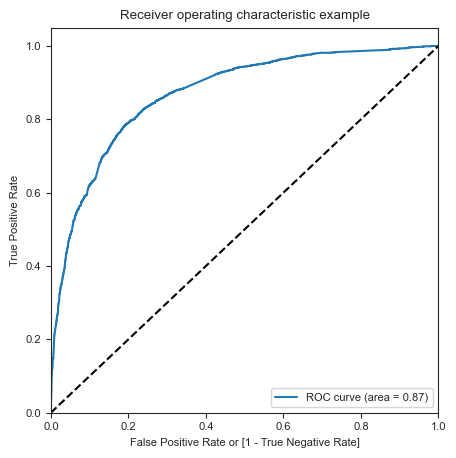

In [153]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Converted_Prob)

#### Finding Optimal Cutoff Point

In [154]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Converted_Prob,Lead Number,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,1,0.793903,8432,1,1,1,1,1,1,1,1,1,0,0
1,1,0.840283,7547,1,1,1,1,1,1,1,1,1,1,0
2,0,0.130306,2218,0,1,1,0,0,0,0,0,0,0,0
3,0,0.344772,7654,0,1,1,1,1,0,0,0,0,0,0
4,1,0.410315,7127,0,1,1,1,1,1,0,0,0,0,0


In [155]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.384508  1.000000  0.000000
0.1   0.1  0.603432  0.969441  0.374780
0.2   0.2  0.703309  0.926417  0.563929
0.3   0.3  0.781385  0.836349  0.747048
0.4   0.4  0.799320  0.782871  0.809596
0.5   0.5  0.801484  0.703257  0.862849
0.6   0.6  0.787879  0.573784  0.921628
0.7   0.7  0.768707  0.473261  0.953278
0.8   0.8  0.739641  0.371934  0.969354
0.9   0.9  0.691558  0.212706  0.990706


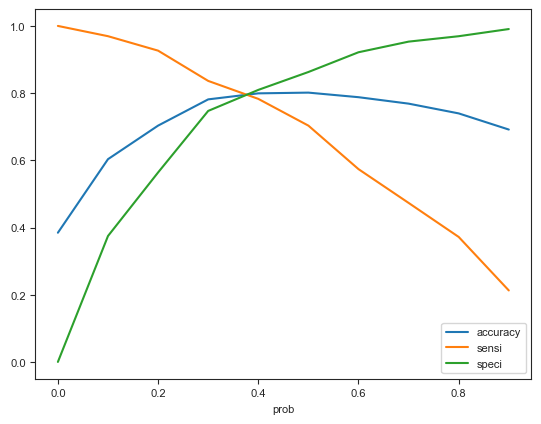

In [156]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

#### From the curve above intersection point is somewhere between 0.35 and 0.4, lets assume to be midpoint (0.375) is cut off probability

In [157]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Converted_Prob.map( lambda x: 1 if x > 0.375 else 0)

y_train_pred_final.head()

,Converted,Converted_Prob,Lead Number,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,1,0.793903,8432,1,1,1,1,1,1,1,1,1,0,0,1
1,1,0.840283,7547,1,1,1,1,1,1,1,1,1,1,0,1
2,0,0.130306,2218,0,1,1,0,0,0,0,0,0,0,0,0
3,0,0.344772,7654,0,1,1,1,1,0,0,0,0,0,0,0
4,1,0.410315,7127,0,1,1,1,1,1,0,0,0,0,0,1


In [158]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.7951453308596166

In [159]:
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

array([[3164,  817],
       [ 508, 1979]], dtype=int64)

In [160]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [161]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.7957378367511058

In [162]:
# Let us calculate specificity
TN / float(TN+FP)

0.7947751821150465

In [163]:
# Calculate false postive rate - predicting converted lead when customer has not converted to lead
print(FP/ float(TN+FP))

0.20522481788495353


In [164]:
# Positive predictive value 
print (TP / float(TP+FP))

0.707796852646638


In [165]:
# Negative predictive value
print (TN / float(TN+ FN))

0.8616557734204793


In [166]:
y_train_pred_final['Score'] = y_train_pred_final.Converted_Prob.map(lambda x: round(x*100))
y_train_pred_final

,Converted,Converted_Prob,Lead Number,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted,Score
0,1,0.793903,8432,1,1,1,1,1,1,1,1,1,0,0,1,79
1,1,0.840283,7547,1,1,1,1,1,1,1,1,1,1,0,1,84
2,0,0.130306,2218,0,1,1,0,0,0,0,0,0,0,0,0,13
3,0,0.344772,7654,0,1,1,1,1,0,0,0,0,0,0,0,34
4,1,0.410315,7127,0,1,1,1,1,1,0,0,0,0,0,1,41
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6463,0,0.073657,7839,0,1,0,0,0,0,0,0,0,0,0,0,7
6464,0,0.074928,3603,0,1,0,0,0,0,0,0,0,0,0,0,7
6465,0,0.060315,5959,0,1,0,0,0,0,0,0,0,0,0,0,6
6466,1,0.245739,5426,0,1,1,1,0,0,0,0,0,0,0,0,25


In [167]:
#taking only the columns with alphabetical column names
final_lead_scoring = y_train_pred_final[["Lead Number","Converted","final_predicted","Score"]]
final_lead_scoring.head()

,Lead Number,Converted,final_predicted,Score
0,8432,1,1,79
1,7547,1,1,84
2,2218,0,0,13
3,7654,0,0,34
4,7127,1,1,41


In [168]:
#showing the predictions made for leads who converted.
final_lead_scoring[final_lead_scoring["Converted"]==1]['final_predicted']

0       1
1       1
4       1
13      1
15      1
       ..
6452    1
6453    1
6460    1
6461    0
6466    0
Name: final_predicted, Length: 2487, dtype: int64

In [169]:
#printing conversion rate
print("Conversion Rate: ", str(round(len(final_lead_scoring[final_lead_scoring["Converted"]==1][final_lead_scoring['final_predicted']==1])/len(final_lead_scoring[final_lead_scoring["Converted"]==1]['final_predicted']),1)*100)+"%")

Conversion Rate:  80.0%


### Precision and Recall

In [170]:
#Looking at the confusion matrix again
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
confusion

array([[3435,  546],
       [ 738, 1749]], dtype=int64)

##### Precision
TP / TP + FP

In [171]:
confusion[1,1]/(confusion[0,1]+confusion[1,1])

0.7620915032679738

##### Recall
TP / TP + FN

In [172]:
confusion[1,1]/(confusion[1,0]+confusion[1,1])

0.7032569360675512

In [173]:
from sklearn.metrics import precision_score, recall_score

In [174]:
precision_score(y_train_pred_final.Converted, y_train_pred_final.predicted)

0.7620915032679738

In [175]:
recall_score(y_train_pred_final.Converted, y_train_pred_final.predicted)

0.7032569360675512

### Precision and Recall tradeoff

In [176]:
from sklearn.metrics import precision_recall_curve

In [177]:
y_train_pred_final.Converted, y_train_pred_final.predicted

(0       1
 1       1
 2       0
 3       0
 4       1
        ..
 6463    0
 6464    0
 6465    0
 6466    1
 6467    0
 Name: Converted, Length: 6468, dtype: int64,
 0       1
 1       1
 2       0
 3       0
 4       0
        ..
 6463    0
 6464    0
 6465    0
 6466    0
 6467    0
 Name: predicted, Length: 6468, dtype: int64)

In [178]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Converted_Prob)

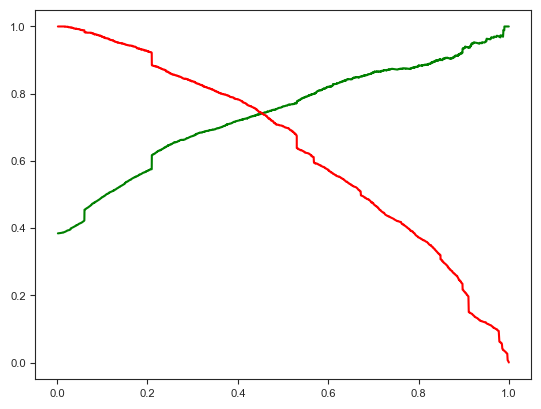

In [179]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

## Model Prediction

#### Making predictions on the test set

In [180]:
X_test[['Total Time Spent on Website sqrt','Page Views Per Visit sqrt','TotalVisits_sqrt']] = scaler.transform(X_test[['Total Time Spent on Website sqrt','Page Views Per Visit sqrt','TotalVisits_sqrt']])

In [181]:
X_test = X_test[col]
X_test.head()

,Total Time Spent on Website sqrt,Page Views Per Visit sqrt,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Olark Chat,Lead Source_Welingak Website,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Specialization_Retail Management,Specialization_Services Excellence,Specialization_Unknown,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable
5736,0.965508,0.660186,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0
8903,-0.952979,2.151898,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0
8196,-0.157452,-0.340052,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
2073,-0.340804,-0.340052,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
6566,0.074710,-0.340052,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0


In [182]:
X_test_sm = sm.add_constant(X_test)

In [183]:
y_test_pred = res.predict(X_test_sm)

In [184]:
y_test_pred[:10]

5736    0.243937
8903    0.088444
8196    0.210058
2073    0.173091
6566    0.102705
4695    0.095542
3262    0.953235
8654    0.060315
2887    0.113146
2184    0.256412
dtype: float64

In [185]:
# Converting y_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_test_pred)

In [186]:
# Let's see the head
y_pred_1.head()

,0
5736,0.243937
8903,0.088444
8196,0.210058
2073,0.173091
6566,0.102705


In [187]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

In [188]:
# Putting CustID to index
y_test_df['Lead Number'] = y_test_df.index

In [189]:
# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [190]:
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [191]:
y_pred_final.head()

,Converted,Lead Number,0
0,0,5736,0.243937
1,0,8903,0.088444
2,0,8196,0.210058
3,0,2073,0.173091
4,0,6566,0.102705


In [192]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Lead_Conversion_Prob'})

In [193]:
# Rearranging the columns
y_pred_final = y_pred_final.reindex(['Lead Number','Converted','Lead_Conversion_Prob'], axis=1)


In [194]:
# Let's see the head of y_pred_final
y_pred_final.head()

,Lead Number,Converted,Lead_Conversion_Prob
0,5736,0,0.243937
1,8903,0,0.088444
2,8196,0,0.210058
3,2073,0,0.173091
4,6566,0,0.102705


In [195]:
y_pred_final['final_predicted'] = y_pred_final.Lead_Conversion_Prob.map(lambda x: 1 if x > 0.375 else 0)

In [196]:
y_pred_final.head()

,Lead Number,Converted,Lead_Conversion_Prob,final_predicted
0,5736,0,0.243937,0
1,8903,0,0.088444,0
2,8196,0,0.210058,0
3,2073,0,0.173091,0
4,6566,0,0.102705,0


In [197]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_predicted)

0.8077200577200577

In [198]:
confusion2 = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_predicted )
confusion2

array([[1374,  324],
       [ 209,  865]], dtype=int64)

In [199]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [200]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.8054003724394786

In [201]:
# Let us calculate specificity
TN / float(TN+FP)

0.8091872791519434

## Modal Summary
- Conversion rate is almost 80% which is a huge improvement from the initial 30% and we are achieving target lead conversion rate as was expected by CEO of X Education company.